<a href="https://colab.research.google.com/github/CrAvila/IA/blob/main/Proyecto1/Inteligencia_Artificial_Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div>
<img src="https://drive.google.com/uc?export=download&id=1lhTXu7FShFdtXWptJH3ZOPyxOdFY8kOf" width="500"/>
</div>


## Pontificia Universidad Javeriana

#### Departamento de Ingenier√≠a Electr√≥nica

#### Inteligencia Artificial

## Proyecto 1

Alumnos:

**Juan Camilo Murcia Su√°rez**

**Carlos Roberto √Åvila Hern√°ndez**

Profesor:

**Alexander Caicedo Dorado**


# Clasificaci√≥n lineal: MNIST

La base de datos MNIST se considera un ejercicio clasico en el √°rea de machine learning. Esta base de datos cuenta con un conjunto de imagenes de digitos manuscritos desde el 0 hasta el 9, la cual se encuentra en en la libreria de scikit-learn. Informaci√≥n sobre el dataset la pueden encontrar [aqu√≠](http://yann.lecun.com/exdb/mnist/), mientras que una explicaci√≥n sobre la funci√≥n en python, especificamente la libreria sci-kit learn, pueden encontrarla [aqu√≠](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Est√° base de dato tiene imag√©nes de car√°cteres escritos desde el 0 hasta el 9. El profesor Alexander quiere que ustedes utilicen sus conocimientos en Machine Learning para resolver este problema.

## 1. Carga de Datos

Importamos la biblioteca datasets de Scikit-Learn, que contiene funciones para cargar conjuntos de datos predefinidos.

Usamos la funci√≥n datasets.load_digits() para cargar el conjunto de datos de d√≠gitos escritos a mano. Esto te proporciona un objeto que contiene las im√°genes de los d√≠gitos y las etiquetas asociadas.

In [1]:
# Se importan las librer√≠as necesarias
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
import math
import random

import warnings
warnings.filterwarnings("ignore")

# Se cargan los datos
digits = load_digits()

Ahora, podemos utilizar la propiedad `DESCR` para obtener informaci√≥n descriptiva sobre este conjunto de datos.


In [2]:
# Se muestra la descripci√≥n de los datos
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Para poder tener una idea de como lucen estos datos, podemos observar un d√≠gito escrito a mano. Cada observaci√≥n en el conjunto de datos se compone de una matriz de p√≠xeles en escala de grises, donde cada p√≠xel representa un valor de intensidad. La imagen tiene una dimensi√≥n de 8x8 p√≠xeles, lo que significa que cada observaci√≥n se representa como un vector en $\mathbb{R}^{64}$ (un vector de 64 dimensiones), donde cada dimensi√≥n corresponde a un p√≠xel en la imagen. Estos vectores en $\mathbb{R}^{64}$ se utilizan como datos de entrada para el proceso de clasificaci√≥n. El objetivo principal de la clasificaci√≥n es predecir a qu√© d√≠gito corresponde cada imagen en funci√≥n de los valores de intensidad de p√≠xeles en estos vectores.


<Figure size 640x480 with 0 Axes>

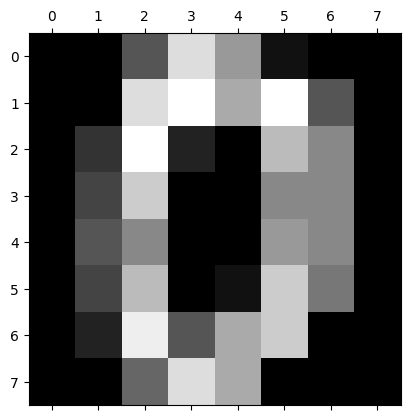

In [3]:
# Activa la escala de grises
plt.gray()

# Muestra una de las im√°genes
plt.matshow(digits.images[0])
plt.show()


## 2. An√°lisis Descriptivo de los Datos




En esta secci√≥n, nos sumergiremos en un an√°lisis descriptivo exhaustivo para comprender mejor la informaci√≥n contenida en nuestro conjunto de datos de d√≠gitos escritos a mano. Nuestro objetivo es adquirir una visi√≥n m√°s profunda de la naturaleza de los d√≠gitos y sus caracter√≠sticas.

Para lograr esto, exploraremos diversas estad√≠sticas, gr√°ficas y datos que nos permitir√°n familiarizarnos con nuestra informaci√≥n. Esto incluir√° medidas de tendencia central y dispersi√≥n para comprender las caracter√≠sticas num√©ricas de los datos, visualizaciones gr√°ficas para identificar patrones y estructuras, y res√∫menes descriptivos que nos ayudar√°n a extraer informaci√≥n relevante.

A trav√©s de este an√°lisis detallado, no solo obtendremos una visi√≥n m√°s clara de nuestros datos, sino que tambi√©n estaremos mejor preparados para abordar la tarea de clasificaci√≥n de los d√≠gitos.

**Distribuci√≥n de Clases:** Antes de avanzar en nuestro an√°lisis y modelado, es esencial comprender c√≥mo est√°n distribuidas las diferentes clases de d√≠gitos en nuestro conjunto de datos. Esta informaci√≥n nos proporciona una visi√≥n fundamental de la balanceado o desbalanceado que est√° el conjunto de datos en t√©rminos de la cantidad de muestras por clase.

Para visualizar esta distribuci√≥n, hemos creado un gr√°fico de barras que muestra cu√°ntas muestras tenemos para cada clase de d√≠gito. Cada barra en el gr√°fico representa una clase, y la altura de la barra indica el n√∫mero de muestras que pertenecen a esa clase.

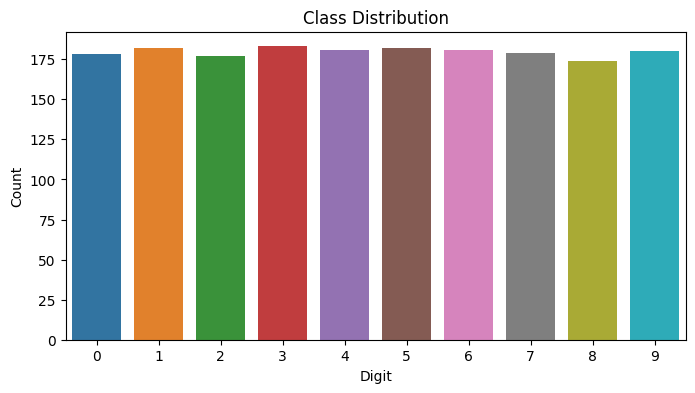

In [4]:
# Class Distribution Analysis
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=digits)
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')

# Save the class distribution plot
plt.savefig('class_distribution.png')

# Show the class distribution plot
plt.show()

Al realizar la gr√°fica de distribuci√≥n de clases, observamos que los datos est√°n balanceados y que tienen distribuciones similares, eso es una se√±al positiva para el conjunto de datos. Un conjunto de datos balanceado, donde cada clase tiene una cantidad similar de muestras, a menudo es beneficioso para el entrenamiento de modelos de clasificaci√≥n, ya que el modelo tiene suficientes ejemplos de cada clase para aprender patrones de manera efectiva.

**Vistazo General**: Examinaremos una selecci√≥n de filas del conjunto de datos para visualizar las representaciones gr√°ficas de algunos d√≠gitos y obtener una comprensi√≥n inicial de las caracter√≠sticas del conjunto de datos en su totalidad.

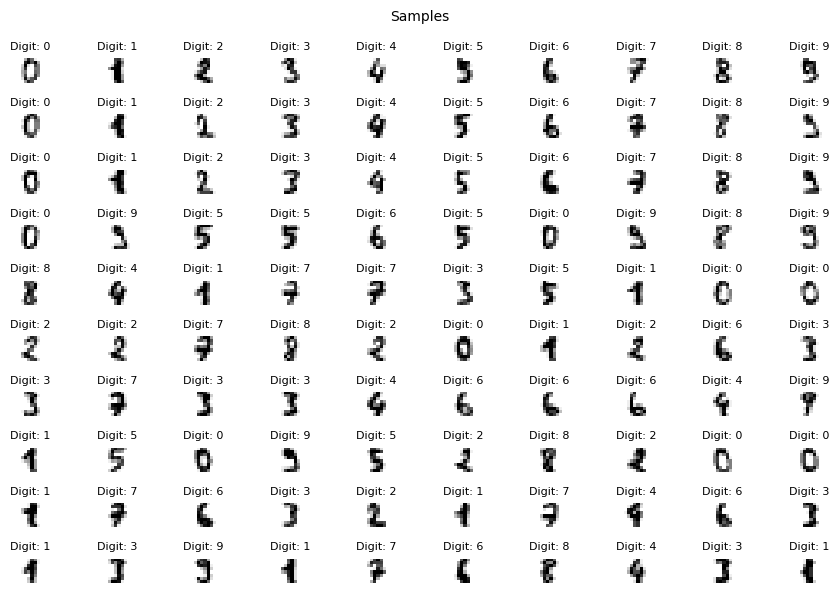

In [5]:
# Se muestran las primeras mxn im√°genes de los d√≠gitos
def show_numbers(rows, cols, data, targets, size=(8,8), suptitle = None, knn = None):
    plt.figure(figsize=(size))

    if suptitle:
        plt.suptitle(suptitle, fontsize=10)

    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)

        try:
            plt.imshow(data[i].reshape(8, 8), cmap='binary', vmin=min(data[i]), vmax=max(data[i]))
            knn_label = ('\n' + f'Model: {knn[i]}') if knn else ''
            label = str(targets[i])  + knn_label

            plt.title(f'Digit: {label}', fontsize=8, color='black')
        except:
            plt.imshow(np.array([0 for i in range(64)]).reshape(8,8), cmap = 'binary')

        plt.axis('off')



    plt.tight_layout()
    plt.show()

show_numbers(10, 10, digits.data, digits.target, (9, 6), suptitle="Samples")

**Centroides Promedio por Clase**:  A continuaci√≥n, calcularemos el centroide promedio para cada clase de d√≠gito en nuestro conjunto de datos. Esto implica determinar el valor promedio de cada p√≠xel en todas las im√°genes que pertenecen a la misma clase. Luego, graficaremos estos centroides promedio como im√°genes para obtener una representaci√≥n visual de c√≥mo se ve cada clase de d√≠gito en promedio. Esta visualizaci√≥n nos proporcionar√° informaci√≥n sobre las caracter√≠sticas distintivas de cada clase y nos ayudar√° a comprender mejor la variabilidad dentro de nuestro conjunto de datos.

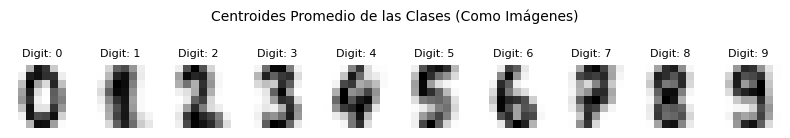

In [6]:

# Average Centroid of Classes
class_centroids = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Average centroid of each class
    class_centroid = np.mean(digit_data, axis=0)

    class_centroids.append(class_centroid)

# Convert the list of class centroids to a NumPy array
class_centroids = np.array(class_centroids)

show_numbers(1, 10, class_centroids, np.array([i for i in range(10)]), (8, 1.5), suptitle="Centroides Promedio de las Clases (Como Im√°genes)")

Al graficar los centroides promedio, notamos que la representaci√≥n promedio de cada clase se asemeja significativamente a c√≥mo com√∫nmente escribimos los d√≠gitos a mano. Estos centroides promedio capturan fielmente la apariencia esperada de cada d√≠gito.

**Desviaciones Promedio por Clase**: Adem√°s de calcular los centroides promedio por clase, tambi√©n vamos a calcular las desviaciones promedio para cada clase de d√≠gito en nuestro conjunto de datos. Esto implica determinar c√≥mo var√≠a la intensidad de p√≠xeles en cada regi√≥n de las im√°genes de una clase espec√≠fica en relaci√≥n con el centroide promedio de esa clase. Luego, visualizaremos estas desviaciones promedio como im√°genes para identificar las regiones donde las im√°genes de una clase tienden a variar m√°s con respecto a su centroide promedio.

Esta visualizaci√≥n nos proporcionar√° informaci√≥n valiosa sobre las caracter√≠sticas distintivas y las variabilidades dentro de cada clase de d√≠gito. Nos ayudar√° a identificar las regiones espec√≠ficas de las im√°genes que son m√°s propensas a cambios o diferencias entre d√≠gitos de la misma clase. Este conocimiento puede ser √∫til para mejorar la precisi√≥n de nuestro modelo de clasificaci√≥n, ya que nos permitir√° enfocarnos en las √°reas cr√≠ticas de las im√°genes al realizar futuras tareas de preprocesamiento o selecci√≥n de caracter√≠sticas.

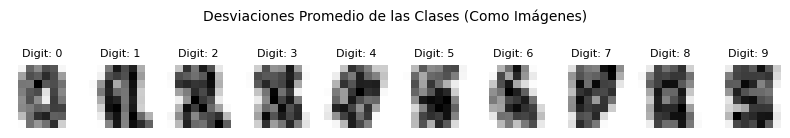

In [7]:
# Average Deviations per Class
class_deviations = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Standard deviation of each pixel within the class
    class_deviation = np.std(digit_data, axis=0)

    class_deviations.append(class_deviation)

# Convert the list of class deviations to a NumPy array
class_deviations = np.array(class_deviations)

show_numbers(1, 10, class_deviations, np.array([i for i in range(10)]), (8, 1.5), suptitle="Desviaciones Promedio de las Clases (Como Im√°genes)")


Al analizar las desviaciones promedio, notamos patrones interesantes en la variabilidad de los d√≠gitos. Observamos que las desviaciones tienden a ser m√°s pronunciadas en los contornos de los n√∫meros, donde la intensidad de p√≠xeles es m√°s baja, mientras que en el interior de los n√∫meros, la variabilidad es menor y la intensidad de p√≠xeles es m√°s uniforme.

En algunos d√≠gitos, podemos notar que la silueta del n√∫mero se representa con una intensidad m√°s baja y que alrededor de esta silueta la intensidad es mucho m√°s oscura. Esto sugiere que la variabilidad se concentra en las regiones cercanas a los contornos, lo que podr√≠a indicar que estas √°reas son m√°s propensas a variaciones en la forma de escribir los d√≠gitos.

Sin embargo, en los d√≠gitos 8 y 9, observamos una variabilidad mucho m√°s dispersa, no solo en los contornos, sino en muchas m√°s zonas. Esto puede indicar que algunos de estos d√≠gitos son m√°s desafiantes de predecir, ya que muestran una variabilidad significativa en m√∫ltiples √°reas de la imagen. Este conocimiento nos prepara para tratar con d√≠gitos que pueden ser especialmente dif√≠ciles de clasificar debido a su variabilidad en diversas partes de la imagen.

**Norma Promedio de Clase:**  Vamos a calcular la norma euclidiana promedio para cada clase de d√≠gito en nuestro conjunto de datos. Esta medida nos ayudar√° a entender no solo la dispersi√≥n de las im√°genes de una clase en relaci√≥n con su centroide promedio, sino tambi√©n la intensidad de p√≠xeles promedio utilizada y la complejidad del trazo de cada clase.

Si la norma euclidiana promedio es baja para una clase en particular, no solo indica que las im√°genes de esa clase son similares entre s√≠, sino que tambi√©n tienden a utilizar una intensidad de p√≠xeles similar en sus trazos. Esto podr√≠a sugerir que la clase tiene una estructura m√°s uniforme y predecible en t√©rminos de c√≥mo se representan gr√°ficamente los d√≠gitos.

Por otro lado, si la norma euclidiana promedio es alta, esto podr√≠a indicar que las im√°genes de esa clase son m√°s dispersas en t√©rminos de intensidad de p√≠xeles y trazo. Esto podr√≠a sugerir una mayor variabilidad en la forma en que se dibujan los d√≠gitos de esa clase.

Esta informaci√≥n es relevante para comprender c√≥mo se representan visualmente los d√≠gitos en cada clase y podr√≠a influir en las estrategias de preprocesamiento o selecci√≥n de caracter√≠sticas que elijamos al dise√±ar nuestro modelo de clasificaci√≥n. Adem√°s, podr√≠a ayudarnos a identificar clases que podr√≠an ser m√°s desafiantes de separar debido a su mayor variabilidad visual.

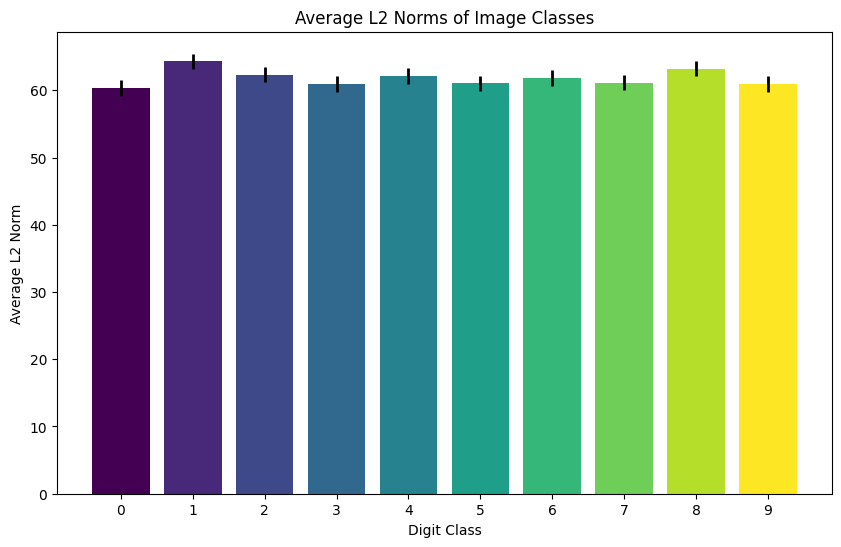

In [8]:
# Calculate class-wise average L2 norms
class_norms = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Calculate the L2 norm for each image in the class
    norms = np.linalg.norm(digit_data, axis=1)

    # Calculate the average norm for the class
    avg_norm = np.mean(norms)

    class_norms.append(avg_norm)

# Create a color map for the bars
colors = plt.get_cmap('viridis', len(class_norms))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average L2 norms with error bars
plt.bar(range(10), class_norms, tick_label=list(range(10)), color=colors(range(10)))
plt.errorbar(range(10), class_norms, yerr=np.std(class_norms), fmt='none', ecolor='black', elinewidth=2)

# Customize the plot
plt.title('Average L2 Norms of Image Classes')
plt.xlabel('Digit Class')
plt.ylabel('Average L2 Norm')
plt.xticks(range(10))

# Show the plot
plt.show()


Al analizar las desviaciones promedio, notamos patrones interesantes en la variabilidad de los d√≠gitos. Observamos que las desviaciones tienden a ser m√°s pronunciadas en los contornos de los n√∫meros, donde la intensidad de p√≠xeles es m√°s baja, mientras que en el interior de los n√∫meros, la variabilidad es menor y la intensidad de p√≠xeles es m√°s uniforme.

En algunos d√≠gitos, podemos notar que la silueta del n√∫mero se representa con una intensidad m√°s baja y que alrededor de esta silueta la intensidad es mucho m√°s oscura. Esto sugiere que la variabilidad se concentra en las regiones cercanas a los contornos, lo que podr√≠a indicar que estas √°reas son m√°s propensas a variaciones en la forma de escribir los d√≠gitos.

Sin embargo, en los d√≠gitos 8 y 9, observamos una variabilidad mucho m√°s dispersa, no solo en los contornos, sino en muchas m√°s zonas. Esto puede indicar que algunos de estos d√≠gitos son m√°s desafiantes de predecir, ya que muestran una variabilidad significativa en m√∫ltiples √°reas de la imagen. Este conocimiento nos prepara para tratar con d√≠gitos que pueden ser especialmente dif√≠ciles de clasificar debido a su variabilidad en diversas partes de la imagen.

**Norma $L_1$ Promedio por Clase:**A continuaci√≥n, vamos a calcular la norma L1 promedio para cada clase de d√≠gito en nuestro conjunto de datos. La norma L1 es una medida que cuantifica la distancia entre dos puntos en un espacio vectorial utilizando la suma de las diferencias absolutas entre sus componentes.

El c√°lculo de la norma L1 promedio nos permitir√° comprender la dispersi√≥n y la intensidad de p√≠xeles utilizada en cada clase de d√≠gito de manera similar a la norma euclidiana promedio. Sin embargo, la norma L1 puede proporcionar una perspectiva diferente, ya que enfatiza las diferencias absolutas en lugar de las diferencias cuadr√°ticas.

Esto podr√≠a ser √∫til para identificar patrones espec√≠ficos de intensidad de p√≠xeles en las im√°genes de cada clase. Si la norma L1 promedio es baja para una clase, sugiere que las im√°genes de esa clase tienden a ser similares en t√©rminos de intensidad de p√≠xeles, pero tambi√©n que las diferencias en intensidad se pueden describir mediante valores absolutos bajos. Esto podr√≠a indicar una consistencia en la intensidad de p√≠xeles y trazos en la representaci√≥n de esa clase.

Por otro lado, si la norma L1 promedio es alta, podr√≠a sugerir una mayor variabilidad en la intensidad de p√≠xeles y en c√≥mo se dibujan los d√≠gitos de esa clase. Esto podr√≠a ayudarnos a identificar clases que presenten desaf√≠os espec√≠ficos en t√©rminos de su variabilidad de intensidad y trazo.

In [9]:
# Calculate class-wise average L1 norms
class_norms_l1 = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Calculate the L1 norm for each image in the class
    norms_l1 = np.linalg.norm(digit_data, ord=1, axis=1)

    # Calculate the average L1 norm for the class
    avg_norm_l1 = np.mean(norms_l1)

    class_norms_l1.append(avg_norm_l1)

# Create a color map for the bars
colors = plt.get_cmap('viridis', len(class_norms_l1))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average L1 norms with error bars
plt.bar(range(10), class_norms_l1, tick_label=list(range(10)), color=colors(range(10)))
plt.errorbar(range(10), class_norms_l1, yerr=np.std(class_norms_l1), fmt='none', ecolor='black', elinewidth=2)

# Customize the plot
plt.title('Average L1 Norms of Image Classes')
plt.xlabel('Digit Class')
plt.ylabel('Average L1 Norm')
plt.xticks(range(10))

# Show the plot
plt.show()


En este contexto, observamos que el d√≠gito 8 tiene el valor de norma L1 promedio m√°s alto, seguido por el d√≠gito 9 y el d√≠gito 0.

Un valor de norma L1 promedio alto para el d√≠gito 8 sugiere que las im√°genes de este d√≠gito tienden a ser m√°s diversas en t√©rminos de la intensidad de p√≠xeles y la forma en que se representan. Esto podr√≠a indicar que el d√≠gito 8 puede escribirse de varias maneras distintas y, por lo tanto, presenta una mayor variabilidad en su apariencia.El d√≠gito 9 tambi√©n muestra un valor de norma L1 promedio alto, lo que sugiere una variabilidad considerable en la intensidad de p√≠xeles y la forma en que se representa. Esto podr√≠a indicar que el d√≠gito 9 puede ser dif√≠cil de predecir debido a las m√∫ltiples formas en que puede escribirse.Aunque el d√≠gito 0 tiene un valor de norma L1 promedio m√°s bajo en comparaci√≥n con el 8 y el 9, a√∫n se encuentra entre los m√°s altos en la medida. Esto sugiere que, aunque el d√≠gito 0 puede ser un poco m√°s consistente en su representaci√≥n que el 8 y el 9, todav√≠a presenta cierta variabilidad en la forma en que se escribe.

**Uso de las Intensidades**: En la siguiente gr√°fica, hemos realizado una visualizaci√≥n de los valores de p√≠xeles en cada clase de d√≠gito.

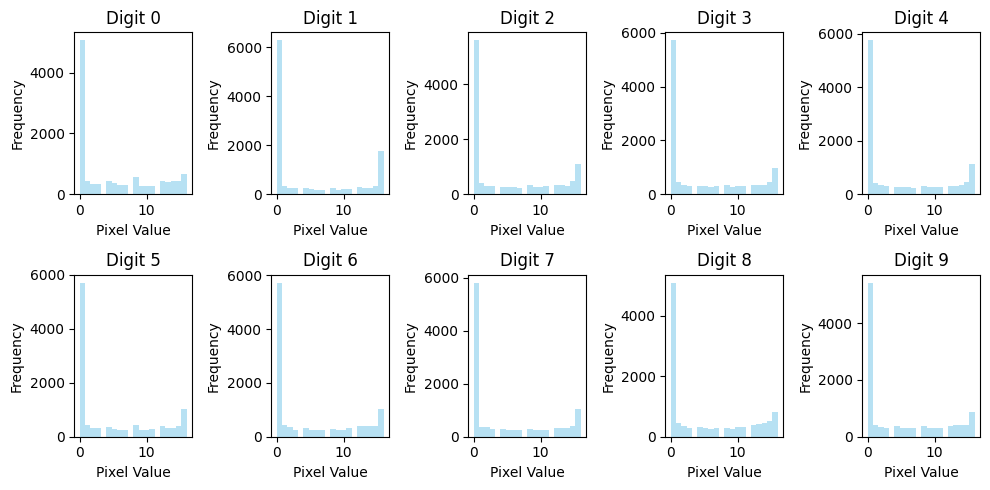

In [10]:
# Summary Statistics
mean_pixel_values = np.mean(digits.data, axis=0)
std_pixel_values = np.std(digits.data, axis=0)

# Data Visualization
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit_data = digits.data[digits.target == i]
    plt.hist(digit_data.ravel(), bins=20, color='skyblue', alpha=0.6)
    plt.title(f'Digit {i}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
plt.tight_layout()

# Save the data visualization plot
plt.savefig('data_visualization.png')

# Show the data visualization plot
plt.show()

Cada subgr√°fico representa un d√≠gito espec√≠fico, del 0 al 9, y muestra la distribuci√≥n de los valores de p√≠xeles en ese d√≠gito en particular. Los resultados de esta visualizaci√≥n revelan patrones interesantes en la intensidad de p√≠xeles utilizada en las representaciones de cada d√≠gito. Por ejemplo, notamos que en la clase del d√≠gito 0, el valor del p√≠xel m√°s com√∫n es el cero, lo que sugiere una presencia dominante de √°reas en blanco en las im√°genes de este d√≠gito. Adem√°s, para el d√≠gito 1, observamos un uso significativo de la intensidad m√°xima y pocos valores de p√≠xeles de baja intensidad. Estas observaciones proporcionan informaci√≥n valiosa sobre las caracter√≠sticas distintivas de cada d√≠gito y c√≥mo se representan visualmente, lo que puede influir en las estrategias de procesamiento y modelado de datos posteriores.

**Matriz de Correlaci√≥n:** La matriz de correlaci√≥n es una herramienta fundamental en el an√°lisis de datos que nos permite examinar las relaciones y dependencias entre variables. En el contexto de nuestro conjunto de datos de d√≠gitos escritos a mano, hemos calculado la matriz de correlaci√≥n para comprender c√≥mo se relacionan los p√≠xeles de las im√°genes entre s√≠. Esta matriz nos proporciona informaci√≥n valiosa sobre si la intensidad de un p√≠xel est√° relacionada de alguna manera con la intensidad de otros p√≠xeles en las im√°genes. A trav√©s de esta exploraci√≥n, buscamos identificar patrones de correlaci√≥n que podr√≠an influir en el proceso de clasificaci√≥n de los d√≠gitos.

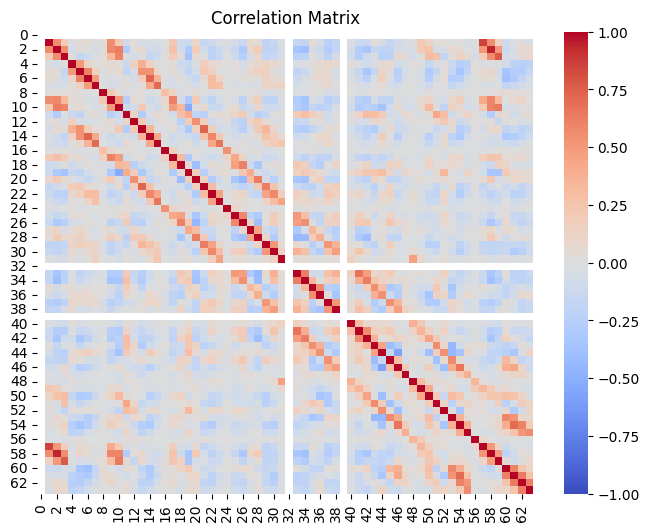

In [11]:
# Correlation Analysis
correlation_matrix = np.corrcoef(digits.data, rowvar=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title('Correlation Matrix')

# Save the correlation analysis plot
plt.savefig('correlation_analysis.png')

# Show the correlation analysis plot
plt.show()

Tras analizar la matriz de correlaci√≥n de nuestro conjunto de datos de d√≠gitos escritos a mano, hemos observado diversas relaciones entre los p√≠xeles de las im√°genes. En general, notamos que algunos p√≠xeles est√°n altamente correlacionados entre s√≠, lo que sugiere que su intensidad tiende a variar juntos en las im√°genes. Esta informaci√≥n puede ser √∫til al dise√±ar estrategias de preprocesamiento y selecci√≥n de caracter√≠sticas, ya que nos permite identificar √°reas de las im√°genes que pueden ser redundantes en t√©rminos de informaci√≥n. Adem√°s, el an√°lisis de la matriz de correlaci√≥n nos ayuda a comprender mejor c√≥mo se estructuran los d√≠gitos en t√©rminos de la intensidad de p√≠xeles y puede ser relevante para el desarrollo de futuros modelos de clasificaci√≥n. En √∫ltima instancia, la matriz de correlaci√≥n es una herramienta esencial en nuestro proceso de an√°lisis de datos que contribuye a nuestra comprensi√≥n de las relaciones entre variables y nos gu√≠a en la toma de decisiones informadas en la creaci√≥n de modelos de aprendizaje autom√°tico.

## 3. Clasificador K-Nearest Neighbors

#### **Implementaci√≥n desde Cero**

A continuaci√≥n, se desarrollar√° un clasificador KNN desde cero, partiendo desde una matriz que contenga todos nuestros datos incluyendo la salida.

In [12]:
# Datos X
X = digits.data

# Labels
y = digits.target

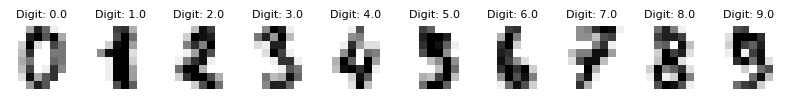

In [13]:
# Matriz aumentada (inlucyendo los datos de salida)
Xa = np.column_stack((np.array(X), y))

show_numbers(1, 10, Xa[:, :-1], Xa[:, -1])

Supongamos que tenemos $m$ elementos en $\mathbb{R}^{n}$, con:

$$\mathbf{x}^{(i)}=\left[\begin{array}{c}
    x_1^{(i)} \\
    x_2^{(i)} \\
    \vdots \\
    x_n^{(i)} \\
\end{array}\right] \in \mathbb{R}^{n}
$$

Donde cada $\mathbf{x}^{(i)}$ tiene su correspondiente salida $y^{(i)}$ y $y^{(i)} \in C = \{0,1,2, \dots, c\}$ con $c$ siendo el n√∫mero total de clases.

Podemos agrupar dichos elementos en una matriz $\mathbf{D}$. Esta matriz contiene cada uno de los vectores y est√° aumentada para contener sus respectivas salidas:

$$\mathbf{D} = \left[\begin{array}{c|c}
    \left(\mathbf{x}^{(1)}\right)^T & y^{(1)} \\
    \left(\mathbf{x}^{(2)}\right)^T & y^{(2)} \\
    \vdots & \vdots \\
    \left(\mathbf{x}^{(m)}\right)^T & y^{(m)} \\
\end{array}\right]
$$

$$
\mathbf{D} = \left[\begin{array}{ccccc|c}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \ldots & x_{n}^{(1)} & y^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \ldots & x_{n}^{(2)} & y^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    x_{1}^{(m)} & x_{2}^{(m)} & x_{3}^{(m)} & \ldots & x_{n}^{(m)} & y^{(m)} \\
\end{array}\right]
$$

In [14]:
# Se convierte la matriz a una lista normal de Python
Xa = Xa.tolist()

print(f"\nDimensiones: {len(Xa)} x {len(Xa[0])}")


Dimensiones: 1797 x 65


Ahora, seperaremos los datos para crear los conjuntos de entrenamiento y de prueba.

In [15]:
def separate_set(set, proportion):
    # Se mezclan los datos
    random.shuffle(set)

    # Total de datos
    n = len(set)

    # Datos para el conjunto de entrenamiento
    training_n = math.ceil(len(set)*proportion/100)

    # Datos para el conjunto de prueba
    test_n = n - training_n

    training_set = set[0: training_n]
    test_set = set[training_n::]

    return training_set, test_set

In [16]:
training_data, test_data = separate_set(Xa, 80)

print(f"Total de datos de Entrnamiento: {len(training_data)}")
print(f"Total de Datos de Prueba {len(test_data)}")

Total de datos de Entrnamiento: 1438
Total de Datos de Prueba 359


**Normalizaci√≥n:** Se normalizar√° cada variable de los datos de entrenamiento por medio de la normalizaci√≥n min-max, de la siguiente manera:

$$ X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

Donde:
- $X_{\text{norm}}$ es el valor normalizado.
- $X$ es el valor original de la variable.
- $X_{\text{min}}$ es el valor m√≠nimo de la variable en el conjunto de datos de entrenamiento.
- $X_{\text{max}}$ es el valor m√°ximo de la variable en el conjunto de datos de entrenamiento.

In [17]:
def transpose_data(data):
    num_rows = len(data)
    num_cols = len(data[0])
    return [[data[j][i] for j in range(num_rows)] for i in range(num_cols)]

def normalize_column(column):
    x_min = min(column)
    x_max = max(column)
    r = x_max - x_min if x_max - x_min != 0 else 1
    return [(x - x_min) / r for x in column]

def normalize_data(data):
    num_rows = len(data)
    num_cols = len(data[0])

    # Transpose the input data
    t_data = transpose_data(data)

    # Initialize lists for storing min and max values
    min_values = [min(col) for col in t_data[:-1]]
    max_values = [max(col) for col in t_data[:-1]]

    normalized_t_data = [normalize_column(col) for col in t_data[:-1]]

    # Append the last column as integers
    normalized_t_data.append([int(x) for x in t_data[-1]])

    # Transpose the normalized data back to its original shape
    normalized_data = transpose_data(normalized_t_data)

    return normalized_data, min_values, max_values


In [18]:
def normalize_single_observation(observation, min_values, max_values):
    normalized_observation = []

    for x, x_min, x_max in zip(observation, min_values, max_values):
        r = x_max - x_min if x_max - x_min != 0 else 1
        x_norm = (x - x_min) / r
        normalized_observation.append(x_norm)

    normalized_observation.append(observation[-1])

    return normalized_observation


In [19]:
training_data, training_mins, training_maxs = normalize_data(training_data)

test_data = [normalize_single_observation(x, training_mins, training_maxs) for x in test_data]

Para implementar el clasificador, podemos tomar en cuenta distintos tipos de m√©tricas. A continuaci√≥n, se crea la funci√≥n que retorna la distancia $L_p$ entre dos vectores $x_i^{(1)}, x_i^{(2)} \in \mathbb{R}^n$, definida de la siguiente manera:

$$L_p = \left[ \sum_{i=1}^n \left| x_i^{(1)} - x_i^{(2)} \right|^p \right]^{\frac{1}{p}}$$

In [20]:
def lp_distance(a, b, p):

    # Se verifica que los vectores sean de la misma dimensi√≥n
    if len(a) != len(b):
        print("Vectors must have the same dimensions.")
        return

    if p == "inf":
        diff_vector = []
        for i in range(len(a)):
            diff_vector.append( abs( a[i] - b[i] ) )

        return max(diff_vector)

    # Se suman las potencias p de las diferencias en las dimensiones
    s = 0

    for i in range(len(a)):
        s += math.pow( abs(a[i] - b[i]), p)

    # Se obtiene la ra√≠z p-√©sima de la suma
    d = math.pow(s, 1/p)

    return d

A continuaci√≥n se muestra un ejemplo con la distancia Manhattan, Eucl√≠dea y Media de los vectores:

$$\mathbf{a} = [1.1, 2.2, 3.3] , \quad \mathbf{b} = [4.4, 5.5, 6.6]$$

In [21]:
a = [1.1, 2.2, 3.3]
b = [4.4, 5.5, 6.6]

print(f"Distancia Manhattan (p = 1): {lp_distance(a, b, 1)}")
print(f"Distancia Media (p = 1.5): {lp_distance(a, b, 1.5)}")
print(f"Distancia Eucl√≠dea (p = 2): {lp_distance(a, b, 2)}")
print(f"Distancia L_inf (p = oo): {lp_distance(a, b, 'inf')}")

Distancia Manhattan (p = 1): 9.899999999999999
Distancia Media (p = 1.5): 6.864276616071283
Distancia Eucl√≠dea (p = 2): 5.715767664977295
Distancia L_inf (p = oo): 3.3000000000000003


In [22]:
def classify(entry, data, k, metric):

    # Se crea una lista donde se guarda la distancia del input con cada dato y su respectiva clase
    distances_list = [ {"distance": lp_distance(v[:-1], entry, metric), "class": v[-1]} for v in data]

    # Se ordena el diccionario respecto a las distancias
    distances_list = sorted(distances_list, key= lambda x: x['distance'])

    # Se toman en cuenta los primeros k vecinos
    neighbors = distances_list[:k]

    # Se toman las clases de los vecinos
    neighbor_classes = [n["class"] for n in neighbors]

    # Se cuentan las ocurrencias de cada clase en los vecinos
    neighbors_count = {}

    for nc in neighbor_classes:
        if nc in neighbors_count:
            neighbors_count[nc] += 1
        else:
            neighbors_count[nc] = 1

    # Se selecciona la clase con mayor ocurrencias
    max_class = max(neighbors_count.values())
    max_class_neighbors = [neighbor for neighbor, occurrences in neighbors_count.items() if occurrences == max_class]
    prediction = random.choice(max_class_neighbors)

    return prediction

Con esto ya podemos realizar clasificaciones individuales introduciendo los datos de una observaci√≥n. A continuaci√≥n, se extraer√° al azar un dato del conjunto de prueba:

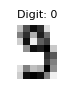

D√≠gito real: 9


In [23]:
# Se extrae un dato al azar
sample = random.choice(test_data)

sample = normalize_single_observation(sample, training_mins, training_maxs)

individual_test = classify(sample[:-1], training_data, 5, 2)

def show_number(number, label, size=(1,1)):
    show_numbers(1, 1, [np.array(number)], [int(label)], size)

show_number(sample[:-1], individual_test)

print(f"D√≠gito real: {int(sample[-1])}")

Ahora, se proceder√° a evaluar todo el conjunto de prueba y separar las clasificaciones correctas de las incorrectas.

In [24]:
def evaluate_knn_classifier(training_set, test_set, k, metric):
    correct_predictions = []
    incorrect_predictions = []

    for observation in test_data:

        # Clase real de la observaci√≥n
        real_digit = observation[-1]

        # Vector de observaci√≥n
        digit_data = observation[:-1]

        # Predicci√≥n del modelo
        prediction = classify(digit_data, training_set, k, metric)

        if prediction == real_digit:
            correct_predictions.append(observation)
        else:
            incorrect_predictions.append( { "data": observation, "prediction" : prediction })

    return correct_predictions, incorrect_predictions

Para esta evaluaci√≥n, se utilizar√°n $k = 5$ vecinos y la distancia $L_2$:

In [25]:
correct_predictions, incorrect_predictions = evaluate_knn_classifier(training_data, test_data, 5, 2)

In [26]:
def display_classifier_results(correct_predictions, incorrect_predictions):
    total_predictions = len(correct_predictions) + len(incorrect_predictions)
    accuracy = len(correct_predictions) / total_predictions

    print("\nClassifier Results:\n")
    print(f"Total Predictions: {total_predictions}")
    print(f"Correct Predictions: {len(correct_predictions)}")
    print(f"Incorrect Predictions: {len(incorrect_predictions)}")
    print(f"Accuracy: {accuracy:.2%}")
    print("")

    # Se muestran algunos datos correctos
    cp_data = [c[:-1] for c in correct_predictions]
    cp_targets = [c[-1] for c in correct_predictions]
    l = f"Some Correct Classifications ({len(cp_data)})"
    show_numbers(3, 10, np.array(cp_data), np.array([int(t) for t in cp_targets]), (7,2), l)


    # Se muestran los datos clasificados erroneamente
    icp_data = [c["data"][:-1] for c in incorrect_predictions]
    icp_targets = [c["data"][-1] for c in incorrect_predictions]
    icp_predictions = [c["prediction"] for c in incorrect_predictions]
    l = f"\n\nIncorrect Classifications ({len(icp_data)})\n"
    show_numbers(1, 10, np.array(icp_data), np.array([int(t) for t in icp_targets]), (7,1.3), l, icp_predictions)

display_classifier_results(correct_predictions, incorrect_predictions)


Classifier Results:

Total Predictions: 359
Correct Predictions: 350
Incorrect Predictions: 9
Accuracy: 97.49%



 ### Rendimiento del Clasificador seg√∫n $k$

La exploraci√≥n de valores de $k$ en el algoritmo KNN generalmente se limita hasta la ra√≠z cuadrada del n√∫mero total de datos de entrenamiento (denominado $n$). Esta elecci√≥n equilibra la eficiencia computacional al evitar c√°lculos excesivos de distancias con la necesidad de capturar patrones locales en los datos. Limitar $k$ de esta manera evita problemas de sobreajuste y se basa en la Ley de los Grandes N√∫meros, que sugiere que en conjuntos de datos grandes, no es necesario considerar todos los datos para obtener estimaciones confiables. Para encontrar el valor √≥ptimo de $k$, es com√∫n realizar una b√∫squeda dentro de este rango y utilizar t√©cnicas de validaci√≥n cruzada para evaluar el rendimiento del modelo.

A continuaci√≥n, evaluaremos el rendimiento del clasificador en funci√≥n de diferentes valores de $k$ y la m√©trica utilizada para medir la distancia.

Adem√°s, se trabajar√° con los datos normalizados. La normalizaci√≥n es beneficiosa en este contexto, ya que ayuda a mantener la coherencia y la equidad en las comparaciones entre distintas m√©tricas y valores de $k$. Al escalarse los datos a una escala com√∫n, aseguramos que todas las caracter√≠sticas contribuyan de manera equitativa en la medici√≥n de distancias, lo que puede mejorar la robustez y la interpretabilidad de los resultados obtenidos en nuestra evaluaci√≥n.

**Para nuestra implementaci√≥n desde cero:**

In [27]:

# Function to evaluate KNN classifier with different metrics
def evaluate_knn_metrics(training_data, test_data, k_values, metrics):
    accuracy_scores = []
    metric_labels = []

    for metric_name, metric_value in metrics.items():
        accuracy_scores_metric = []

        for k in k_values:
            correct_predictions, incorrect_predictions = evaluate_knn_classifier(training_data, test_data, k, metric_value)
            accuracy = len(correct_predictions) / (len(correct_predictions) + len(incorrect_predictions))
            accuracy_scores_metric.append(accuracy)

        accuracy_scores.append(accuracy_scores_metric)
        metric_labels.append(metric_name)

    return accuracy_scores, metric_labels

# Function to plot accuracy scores for different metrics
def plot_accuracy_vs_k(k_values, accuracy_scores, metric_labels):
    sns.set_theme()
    plt.figure(figsize=(12, 5))

    for i, metric_label in enumerate(metric_labels):
        plt.plot(k_values, accuracy_scores[i], marker='o', label=metric_label)

    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k for KNN Classifier with Different Metrics')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Define the metrics and their corresponding values
metrics = {
    'Manhattan': 1,
    'Minkowski (p=1.5)': 1.5,
    'Euclidean': 2,
    'L_inf': "inf"
}

# Define the range of k values
k_values = [x for x in range(1, int(len(training_data) ** 0.5) + 1) if x%2 == 1]

# Evaluate accuracy scores for different metrics
accuracy_scores, metric_labels = evaluate_knn_metrics(training_data, test_data, k_values, metrics)

In [28]:
# Plot accuracy scores
plot_accuracy_vs_k(k_values, accuracy_scores, metric_labels)

In [29]:
def plot_box_plot(accuracy_scores, metric_labels):
    plt.figure(figsize=(12, 6))
    plt.boxplot(accuracy_scores, labels=metric_labels)
    plt.xlabel('Metrics')
    plt.ylabel('Accuracy')
    plt.title('Box Plot of Accuracy for Different Metrics')
    plt.show()

In [30]:
plot_box_plot(accuracy_scores, metric_labels)

**Para KNN con SciKitLearn:**

In [31]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_convert_data(training_data, test_data):
    training_data = np.array(training_data)
    test_data = np.array(test_data)
    return training_data, test_data

def calculate_accuracy_scores(training_data, test_data):
    k_values = list(range(1, int(len(training_data) ** 0.5) + 1))

    metrics = {
        'Manhattan': 'manhattan',
        'Minkowski (p=1.5)': 1.5,
        'Euclidean': 'euclidean',
        'L_inf': 'chebyshev',
    }

    accuracy_scores = {metric_name: [] for metric_name in metrics}

    for metric_name, metric_identifier in metrics.items():
        accuracy_scores_metric = []

        for k in k_values:
            if metric_identifier == 1.5:
                knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1.5)
            else:
                knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric_identifier)

            knn_classifier.fit(training_data[:, :-1], training_data[:, -1])
            y_pred = knn_classifier.predict(test_data[:, :-1])
            accuracy = accuracy_score(test_data[:, -1], y_pred)
            accuracy_scores_metric.append(accuracy)

        accuracy_scores[metric_name] = accuracy_scores_metric

    return k_values, accuracy_scores

def plot_accuracy_vs_k(k_values, accuracy_scores):
    sns.set_theme()
    plt.figure(figsize=(12, 5))

    for metric_name, accuracy_scores_metric in accuracy_scores.items():
        plt.plot(k_values, accuracy_scores_metric, marker='o', label=metric_name)

    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k for KNN Classifier with Different Metrics')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def plot_box_plot(accuracy_scores, metric_labels):
    plt.figure(figsize=(12, 6))
    plt.boxplot(list(accuracy_scores.values()), labels=metric_labels)
    plt.xlabel('Metrics')
    plt.ylabel('Accuracy')
    plt.title('Box Plot of Accuracy for Different Metrics')
    plt.show()

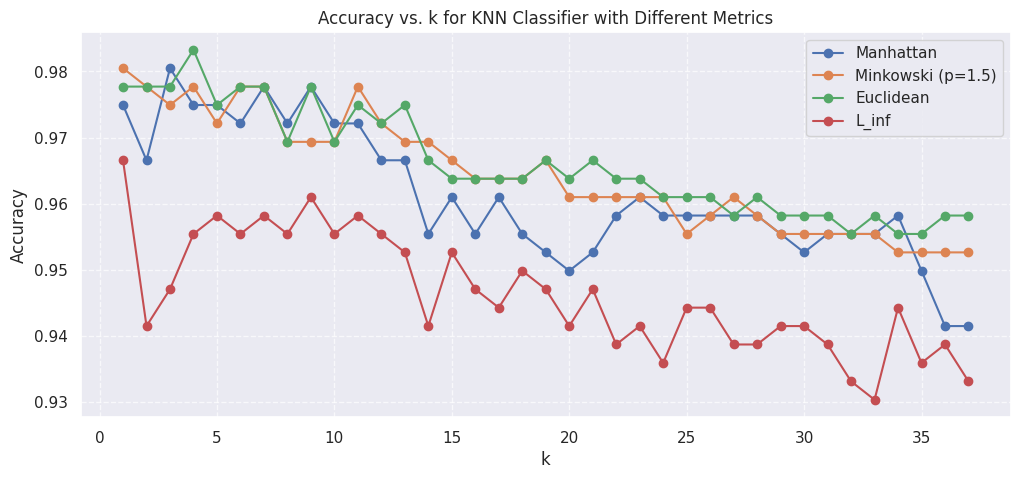

In [38]:
# Plot accuracy vs. k
k_values, accuracy_scores = calculate_accuracy_scores(np.array(training_data), np.array(test_data))
plot_accuracy_vs_k(k_values, accuracy_scores)

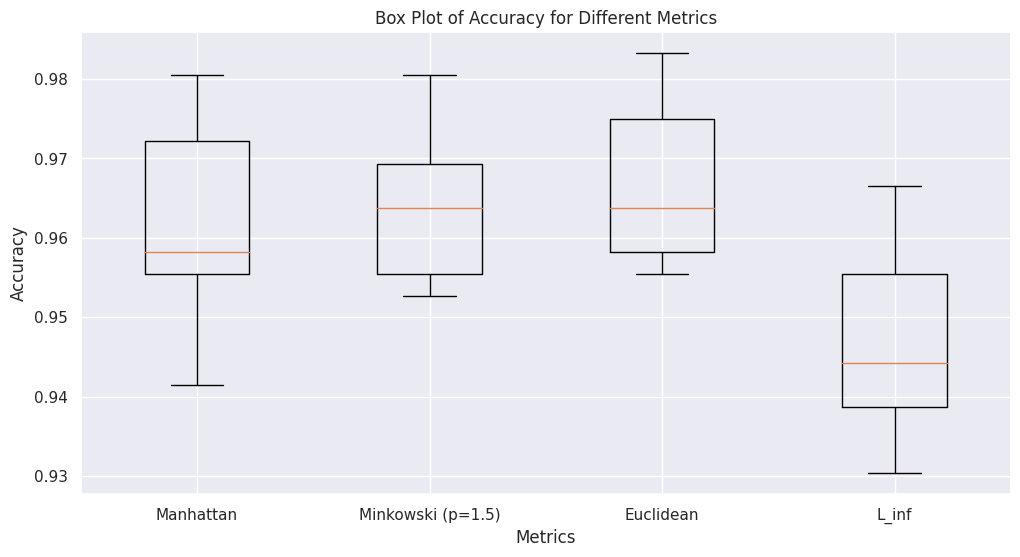

In [39]:
# Plot box plot
plot_box_plot(accuracy_scores, list(metrics.keys()))

Durante las pruebas realizadas, se observa que la norma euclidiana muestra una mayor estabilidad y mejores resultados en general. Esto sugiere que la m√©trica euclidiana es una buena opci√≥n para este conjunto de datos y problema.

Por otro lado, la norma $L_{\infty}$ siempre obtiene peores resultados, lo que puede indicar que esta m√©trica no se adapta bien a los patrones presentes en los datos, al menos de manera relativa ya que a pesar de siempre obtener una precisi√≥n de casi el $95 \%$, siempre se posiciona por detr√°s de las otras m√©tricas.

Las m√©tricas de Manhattan y Minkowski con p=1.5 se encuentran en un punto intermedio, lo que sugiere que pueden ser opciones viables en situaciones donde la m√©trica euclidiana no sea la mejor elecci√≥n. Adem√°s, la m√©trica Manhattan muestra m√°s variabilidad en sus resultados.

Es importante destacar que las diferencias entre los clasificadores (el implementado desde cero y el de sklearn) pueden deberse a los criterios de desempate y a que el algoritmo de sklearn utiliza optimizaciones, como estructuras de datos tipo √°rbol, para evitar calcular cada distancia nuevamente. Esto explica la diferencia en velocidad entre ambos enfoques.



## 4. Regresi√≥n Log√≠stica

Para este clasificador, asumiremos que nuestro modelo tiene la forma:

$$h_{\boldsymbol\theta}(\mathbf{x}) = g(\boldsymbol\theta^{\text{T}}\mathbf{x}),$$

donde $g(\displaystyle\mathbf{z})=\frac{1}{1+e^{-\mathbf{z}}}$ es una funci√≥n sigmoidal o log√≠stica. Por lo tanto la forma del modelo es:

$$h_{\boldsymbol\theta}(\mathbf{x}) = \frac{1}{1+e^{-\boldsymbol\theta^{\text{T}}\mathbf{x}}}.$$

In [40]:
def h_theta(theta, x):
    h = 1 / (1 + np.exp(-theta.T @ x))
    return h

Sea nuestro vector $\mathbf{x}^{(i)} = [x_0^{(i)};x_1^{(i)};\ldots;x_n^{(i)}]$, con $x_0^{(i)} = 1$, para todo $i$, y $\mathbf{x}^{(i)} \in \mathbb{R}^{n+1}$ y $y\in\{0,1\}$. Dado el set de entrenamiento como se encuentran los par√°metros $\boldsymbol\theta$.

Definamos la funci√≥n de costo para nuestra regresi√≥n:

$$\mathbf{J}(\boldsymbol\theta) = \frac{1}{m}\sum_{i=1}^{m}\text{costo}(h_{\boldsymbol\theta}(\mathbf{x}^{(i)}),y^{(i)}),$$

donde  $$ \text{costo}(h_\boldsymbol\theta(\mathbf{x}^{(i)}),y^{(i)}) = -y^{(i)}\log(h_\boldsymbol\theta(\mathbf{x}^{(i)}))-(1-y^{(i)})\log(1-h_\boldsymbol\theta(\mathbf{x}^{(i)})).$$

 $$\mathbf{J}(\boldsymbol\theta) = -\frac{1}{m}\left(\sum_{i=1}^{m}y^{(i)}\log(h_\boldsymbol\theta(\mathbf{x}^{(i)}))+(1-y^{(i)})\log(1-h_\boldsymbol\theta(\mathbf{x}^{(i)}))\right).$$

 Y con Regularizaci√≥n:

  $$\mathbf{J}(\boldsymbol\theta) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(h_\boldsymbol\theta(\mathbf{x}^{(i)}))+(1-y^{(i)})\log(1-h_\boldsymbol\theta(\mathbf{x}^{(i)}))+\frac{\gamma}{2m}\sum_{j=1}^n\theta_j^2.$$

Lo √∫nico que queda por hacer es encontrar los par√°metros $\boldsymbol\theta$ que minimizan esa funci√≥n de costo. Para hacer esto se utiliza gradient descent.

In [41]:
def J(theta, h_theta, y, reg):
    m = len(y)
    J = -(1/m) * sum([yi * np.log(hxi) + (1-yi) * np.log(1 - hxi) for yi, hxi in zip(y, h_theta)]) + (reg/(2*m)) * sum([t**2 for t in theta[1:]])
    return J


El gradiente: $$\frac{\partial\mathbf{J}(\boldsymbol\theta)}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^m\left(h_\boldsymbol\theta(\mathbf{x}^{(i)})-y^{(i)}\right)x_j^{(i)}$$

</div>

Con Regularizaci√≥n:

$$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_0$$

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_j + \frac{\lambda}{m} \theta_j$$


In [42]:
def gradient(x, theta, h_theta, y, reg):
    m = len(y)
    gradient_without_reg = (1 / m) * x.T @ (h_theta - y)
    regularization_term = (reg / m) * theta
    dj = gradient_without_reg + regularization_term
    return dj

As√≠, la regla de actualizaci√≥n de los pesos en gradient descent, par ala regresi√≥n logistica, esta dada por:

$$ \begin{equation}
      \theta_n := \theta_n-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\boldsymbol\theta(\mathbf{x}^{(i)})-y^{(i)}\right]x_n^{(i)}\\
   \end{equation}$$
   
Donde $x_0^{(i)}= 1$ para todo $i$. aunque luce identico al gradiente descendiente para regresi√≥n lineal, no lo es, ya que la funci√≥n $h_\boldsymbol\theta(\mathbf{x})$ es diferente a la funci√≥n de regresi√≥n lineal.


Y con Regularizaci√≥n:

$$ \begin{equation}
\begin{split}
    \theta_0&:=& \theta_0-\alpha\left[\frac{1}{m}\sum_{i=1}^{m}\left[h_\boldsymbol\theta(\mathbf{x}^{(i)})-y^{(i)}\right]x_0^{(i)}\right]\\
\theta_j &:=& \theta_n-\alpha\left[\frac{1}{m}\sum_{i=1}^{m}\left[h_\boldsymbol\theta(\mathbf{x}^{(i)})-y^{(i)}\right]x_j^{(i)}+\frac{\gamma}{m}\theta_j\right]\\
\end{split}
\end{equation}$$

con $j={1,\ldots,n}$. Donde el modelo $h_\boldsymbol\theta(\mathbf{x})$ es la funci√≥n logistica y $x_0^{(i)}=1$.

In [43]:
def update_theta(theta, eta, A, h_theta, y, reg):
    m = len(y)
    gradient_term = (1/m) * A.T @ (h_theta - y)
    regularization_term = (reg/m) * theta
    theta = theta - eta * (gradient_term + regularization_term)
    return theta


La normalizaci√≥n M√≠n-M√°x, tambi√©n conocida como escalado de caracter√≠sticas, es una t√©cnica de preprocesamiento de datos utilizada para transformar datos num√©ricos en un rango espec√≠fico, normalmente [0, 1]. Se consigue mediante la siguiente f√≥rmula:

$$x' = \frac{x - \text{min}_i}{\text{max}_i - \text{min}_i}$$

Donde:
- $x'$ es el valor normalizado de $x$.
- $x$ es el dato original.
- $\text{min}_i$ es el valor m√≠nimo de la caracter√≠stica $i$.
- $\text{max}_i$ es el valor m√°ximo de la caracter√≠stica $i$.

La f√≥rmula resta el valor m√≠nimo $\text{min}_i$ del valor original $x$ para llevarlo a una escala relativa a partir de 0. A continuaci√≥n, se divide por el rango de valores $\text{max}_i - \text{min}_i$ para escalarlo entre $0$ y $1$.

Esta t√©cnica de normalizaci√≥n es √∫til para garantizar que las diferentes caracter√≠sticas con diferentes escalas tienen un impacto coherente en los algoritmos de aprendizaje autom√°tico.

In [44]:
def normalize_data(col):
    # Normalize the data
    min_val = min(col)
    max_val = max(col)
    denominator = max_val - min_val if max_val != min_val else 1.0

    normalized_data = (col - min_val) / denominator
    return normalized_data, min_val, max_val


El problema es que ahora el modelo est√° entrenado con datos normalizados y para utilizarlo, tendr√≠amos que normalizar cada dato de entrada. Al hacerlo y expandir este resultado, obtendr√≠amos lo siguiente:

$$ \hat{y} = \theta_0' + \sum_{i=i}^n \theta_i' x_i'$$

Y tendr√≠amos que normalizar cada entrada:

$$ \hat{y} = \theta_0' + \sum_{i=i}^n \theta_i' \left(\cfrac{x_i - min_i}{max_i - min_i}\right)$$

Al expandir esto, podemos deducir las siguientes f√≥rmulas para ajustar los par√°metros a las proporciones originales:

**1. Ajuste del Intercepto $ \theta_0' $:**

$$ \theta_0' = \theta_0 - \sum_{i=1}^n \theta_i \cdot \left(\frac{{\text{min}}_i}{{\text{max}}_i - {\text{min}}_i}\right) $$

**2. Ajuste de los Coeficientes $ \theta_i' $:**

$$\theta_i' = \theta_i \cdot \frac{1}{{\text{max}}_i - {\text{min}}_i} $$

Donde $ \theta_0' $ y $ \theta_i' $ son los interceptos y coeficientes ajustados, respectivamente, para datos no normalizados. $ \theta_0 $ y $ \theta_i $ son los valores originales obtenidos del entrenamiento con datos normalizados. $ {\text{min}}_i $ y $ {\text{max}}_i $ son los valores m√≠nimo y m√°ximo de los datos originales no normalizados para la caracter√≠stica $ i $, mientras que $ {\text{min}}_y $ y $ {\text{max}}_y $ son los valores m√≠nimo y m√°ximo de la variable de salida original no normalizada.


In [45]:
def denormalize_parameters(normalized_data, theta):
    rescaled_theta = []
    denormalized_intercept = theta[0]

    for i in range(1, len(theta)):
        current_variable = list(normalized_data.keys())[i-1]
        min_i = normalized_data[current_variable]['min_value']
        max_i = normalized_data[current_variable]['max_value']

        if max_i != min_i:
            denominator = max_i - min_i
            denormalized_intercept -= theta[i] * (min_i / denominator)
        else:
            # Handle the case when the range is zero (avoid division by zero)
            denormalized_intercept -= 0

    rescaled_theta.append(denormalized_intercept)

    for variable, parameters, model_param in zip(normalized_data.keys(), normalized_data.values(), theta[1:]):
        min_value = parameters['min_value']
        max_value = parameters['max_value']

        if max_value != min_value:
            # Adjust the model_param using the normalization formula
            rescaled_param = model_param / (max_value - min_value)
        else:
            # Handle the case when the range is zero (avoid division by zero)
            rescaled_param = 0

        rescaled_theta.append(rescaled_param)

    return rescaled_theta


Y Algunas funciones auxiliares:

In [46]:
def print_parameters(params):
  # Print the parameters
  print()
  for i in range(len(params)):
    print(f"Theta[{i}]: {params[i]}")
  print()
  return

In [47]:
def print_variables(selected_vars):
  #Print the selected vriables
    print()
    print()
    print(f"Selected Variables: ")
    print('')
    for var in selected_vars:
      print(var)
    print()

In [48]:
def print_info(label, value):
  # Print the information given with a label
  print()
  print(f"{label} : {value}")
  print()

In [49]:
def get_normalized_data(data, x_variables):
    # Iterate over the variables to normalize them
    normalized_data_dict = {}

    for i, variable in enumerate(x_variables):
        col = data[:, i]
        normalized_data_dict[variable] = {
            'normalized': normalize_data(col)[0],
            'min_value': normalize_data(col)[1],
            'max_value': normalize_data(col)[2]
        }

    return normalized_data_dict

In [50]:
def plot_cost(costs, title):
  # Create a new figure with customized settings
  plt.figure(figsize=(6, 3))
  sns.set(style='darkgrid')
  plt.title(f'Cost Function - Target Class: {title}', fontsize=16)
  plt.xlabel('Epoch', fontsize=14)
  plt.ylabel('Cost', fontsize=14)

  # Plot the costs with a line plot
  plt.plot(costs, linestyle='-', markersize=5, color='b', label='Cost')

  # Add grid lines for better readability
  plt.grid(True, linestyle='--', alpha=0.7)

  # Add legend to the plot
  plt.legend(fontsize=12)

  # Customize the tick labels and sizes
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)

  # Add a horizontal line at y=0 for reference (optional)
  plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

  # Save the plot as an image (optional)
  plt.savefig('cost_plot.png', dpi=300, bbox_inches='tight')

  # Show the plot
  plt.show()

In [51]:
def show_model(theta, variable_names):
    # Create the equation string
    intercept = theta[0]
    coefficients = theta[1:]
    equation = f'y = {intercept:.2f}'


    for i, variable in enumerate(variable_names):
        equation += f' + {coefficients[i]:.2f} * {variable}'

    return equation

In [52]:

def gradient_descent(eta, reg, max_iterations, X, y, target_class):

    # Define target class and data dimensions
    n = len(X)
    m = len(y)

    # Create a binary vector y where it's 1 for the target_class and 0 for others
    y = (y == target_class).astype(int)

    # Stack a column of ones to the feature matrix X
    x = np.column_stack([np.ones(m).T, X])

    # Get variable names
    vars = ["X" + str(i) for i in range(len(x[0]))]

    # Normalize the data
    normalized_data = get_normalized_data(x, vars)
    x = np.column_stack([normalized_data[var]['normalized'] for var in normalized_data])

    max_iterations = int(max_iterations)

    # Initialize parameters
    theta = np.array([random.random() for _ in range(len(x[0]))])

    # Initialize other variables
    h = h_theta(theta, x.T)
    e = h - y
    count = 0
    cost = 0
    previous_cost = 0
    costs = []

    for i in range(max_iterations):
        # Iterate
        previous_cost = J(theta, h, y, reg)  # Pass regularization parameter
        theta = update_theta(theta, eta, x, h, y, reg)  # Pass regularization parameter
        h = h_theta(theta, x.T)
        e = h - y
        cost = J(theta, h, y, reg)  # Pass regularization parameter

        if np.isinf(cost) or np.isnan(cost):
            break

        costs.append(cost)
        cost_diff = abs(previous_cost - cost)
        count += 1
        if cost_diff < 1e-15:  # Adjusted the threshold
            break

    # Show Results
    print(f"\nTarget Class: {target_class}")
    theta = denormalize_parameters(normalized_data, theta)
    print_info("Learning Rate", eta)
    print_info("Max. Iterations: ", max_iterations)
    #print(f"Parameters:")
    #print_parameters(theta)
    #print(f"Number of Iterations: {count}")
    print(f"Final Cost: {cost}")

    plot_cost(costs, target_class)

    return theta

In [54]:

def test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)
    num_test_samples = int(test_size * num_samples)

    # Generate random indices for the test set
    test_indices = np.random.choice(num_samples, num_test_samples, replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)

    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [53]:
X = digits.data
y = digits.target

In [55]:
X_train, X_test, y_train, y_test = test_split(X, y, test_size=0.2, random_state=42)

In [56]:
def multiclass_classifier(eta, reg, max_iters, Xt, yt, classes):

  classifiers = []

  for c in classes:
    cl = gradient_descent(eta, reg, max_iters, Xt, yt, c)
    classifiers.append({"target": c, "theta": cl})

  return classifiers


A continuaci√≥n se realiza el aprendizaje del modelo:


Target Class: 0

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.0927220936330338


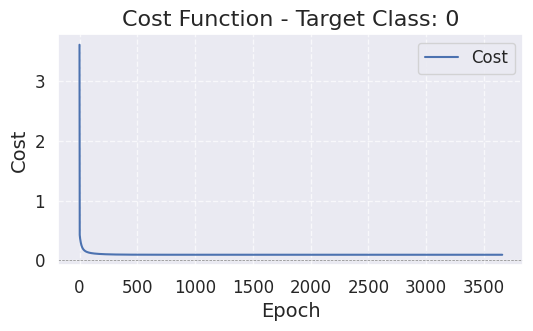


Target Class: 1

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.1622103100985138


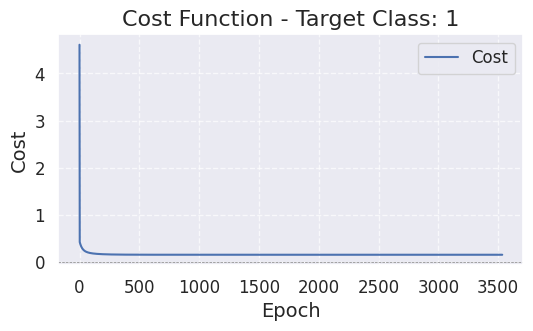


Target Class: 2

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.11855801034260577


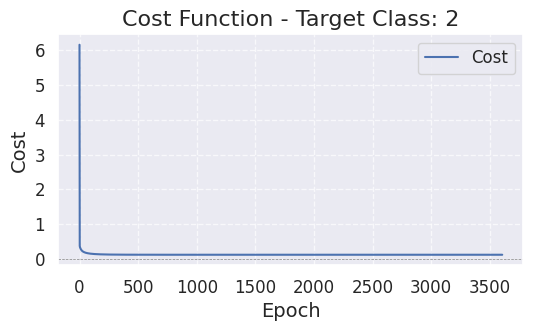


Target Class: 3

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.14437271923159642


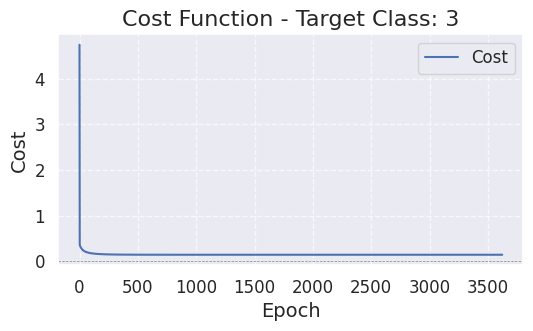


Target Class: 4

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.10424992390085758


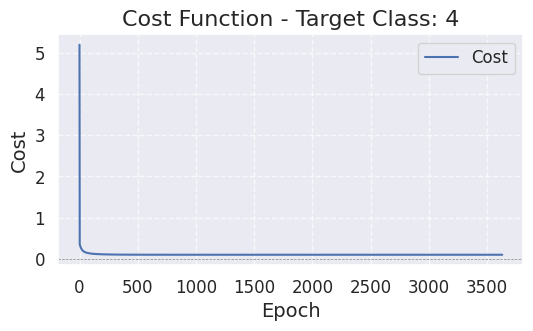


Target Class: 5

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.12181642987157462


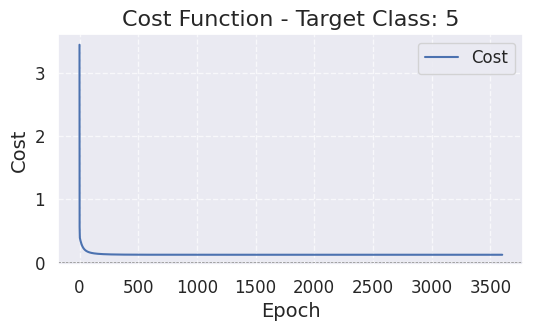


Target Class: 6

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.10414752348421888


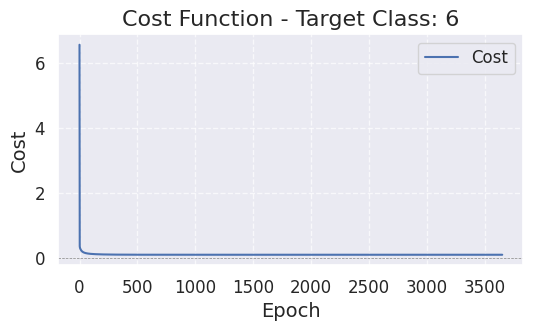


Target Class: 7

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.1083787032710972


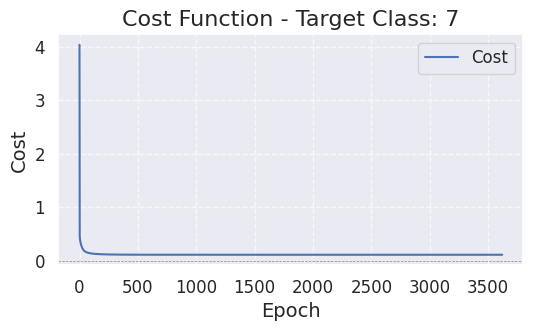


Target Class: 8

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.21332857136712738


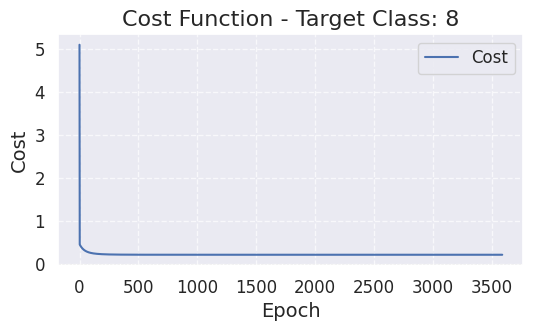


Target Class: 9

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.15631524452366038


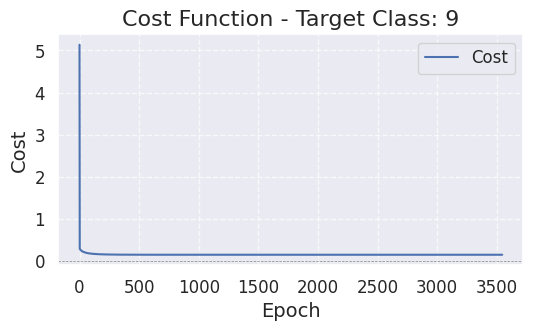

In [93]:
classifiers = multiclass_classifier(0.5, 10, 10000, X_train, y_train, [i for i in range(10)])

Class: 0 -> Probability: 0.03299859257763128
Class: 1 -> Probability: 0.00029381242311005986
Class: 2 -> Probability: 0.02153555175481572
Class: 3 -> Probability: 0.02033270482633368
Class: 4 -> Probability: 0.007701721446622196
Class: 5 -> Probability: 0.7187798868201493
Class: 6 -> Probability: 1.919501346581215e-05
Class: 7 -> Probability: 0.0008077066399502181
Class: 8 -> Probability: 0.00837760547089954
Class: 9 -> Probability: 0.23751173838165826


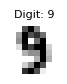

In [58]:
a = 1
sample = X_test[a]
sample = np.hstack((1, sample))

for i, clf in enumerate(classifiers):
  c = np.array(clf["theta"])
  h = h_theta(c, sample)
  print(f"Class: {clf['target']} -> Probability: {h}")

show_number(X_test[a], y_test[a])

In [59]:
def single_entry_classifier(sample, real_result, classifiers, show=False):
    sample = np.hstack((1, sample))
    predictions = []

    for clf in classifiers:
        c = np.array(clf["theta"])
        h = h_theta(c, sample)
        if show:
          print(f"Class: {clf['target']} -> Probability: {h}")
        predictions.append((clf['target'], h))

    # Sort predictions by probability in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Print the prediction
    predicted_class = predictions[0][0]
    if show:
      print(f"Predicted Class: {predicted_class}")

    # Show the number and the ground truth
    if show:
      show_number(sample[1:], predicted_class)
      print(f"Real Digit: {real_result}")
    return predicted_class

Class: 0 -> Probability: 0.07685901789386294
Class: 1 -> Probability: 0.001915755617416455
Class: 2 -> Probability: 0.010353136123418372
Class: 3 -> Probability: 0.00036921620902414354
Class: 4 -> Probability: 0.03563087836973618
Class: 5 -> Probability: 0.9985983184087436
Class: 6 -> Probability: 0.00012843213270073491
Class: 7 -> Probability: 0.0001683224420829949
Class: 8 -> Probability: 0.003647216378402741
Class: 9 -> Probability: 0.0004849708028304463
Predicted Class: 5


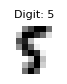

Real Digit: 5


In [60]:
a = 6
predicted_class = single_entry_classifier(X_test[a], y_test[a], classifiers, True)

In [61]:
def evaluate_test_set(classifiers, X_test, y_test):
    correct_predictions = []
    incorrect_predictions = []

    for i, sample in enumerate(X_test):
        for clf in classifiers:
            # Evaluate the input against the current classifier
            predicted_digit = single_entry_classifier(sample, y[i], classifiers)

            # Check if the prediction is correct
            if predicted_digit == y_test[i]:
                correct_predictions.append((sample, y_test[i], predicted_digit))
                break  # Move to the next sample
            else:
                incorrect_predictions.append((sample, y_test[i], predicted_digit))
                break  # Move to the next sample

    # Calculate accuracy
    accuracy = len(correct_predictions) / len(X_test) * 100

    # Display statistics
    print(f"Total Test Samples: {len(X_test)}")
    print(f"Correct Predictions: {len(correct_predictions)}")
    print(f"Incorrect Predictions: {len(incorrect_predictions)}")
    print(f"Accuracy: {accuracy:.2f}%")

    return correct_predictions, incorrect_predictions

In [62]:
# resultados de la clasificaci√≥n con regresi√≥n log√≠stica
lcp, licp = evaluate_test_set(classifiers, X_test, y_test)

Total Test Samples: 359
Correct Predictions: 304
Incorrect Predictions: 55
Accuracy: 84.68%



Classifier Results:

Total Predictions: 359
Correct Predictions: 304
Incorrect Predictions: 55
Accuracy: 84.68%



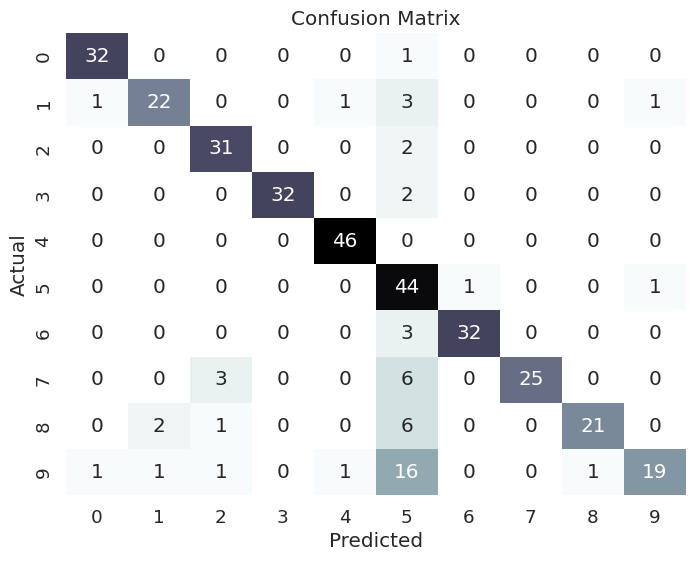

In [73]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def display_classifier_results(correct_predictions, incorrect_predictions, class_names=[i for i in range(10)]):
    total_predictions = len(correct_predictions) + len(incorrect_predictions)
    accuracy = len(correct_predictions) / total_predictions

    print("\nClassifier Results:\n")
    print(f"Total Predictions: {total_predictions}")
    print(f"Correct Predictions: {len(correct_predictions)}")
    print(f"Incorrect Predictions: {len(incorrect_predictions)}")
    print(f"Accuracy: {accuracy:.2%}")
    print("")

    # Create lists for true labels and predicted labels
    true_labels = [int(c[1]) for c in correct_predictions] + [int(c[1]) for c in incorrect_predictions]
    predicted_labels = [int(c[1]) for c in correct_predictions] + [int(c[2]) for c in incorrect_predictions]

    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Display the confusion matrix as a heatmap with class names on both axes
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="bone_r", cbar=False,
                     xticklabels=class_names, yticklabels=class_names)
    ax.set_xlabel("Predicciones")
    ax.set_ylabel("D√≠gitos Reales")
    plt.title("Matriz de Confusi√≥n")
    plt.show()

display_classifier_results(lcp, licp)


Podemos observar tambi√©n, la matriz de confusi√≥n. Donde vemos cuales fueron las predicciones realizadas correctamente y las que no, as√≠ como los d√≠gitos con los cuales fueron confundidos.

## 5. Pesos de los Par√°metros



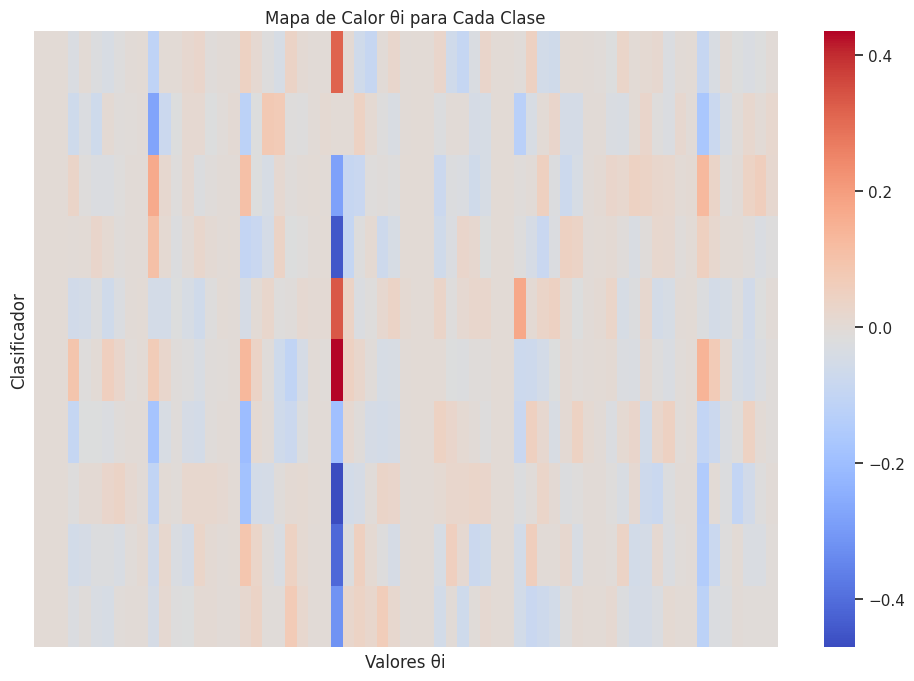

In [125]:

# Preparamos los datos en una matriz donde cada fila corresponde a un clasificador y cada columna a un valor de Œ∏i
num_classifiers = len(classifiers)
num_theta_values = len(classifiers[0]['theta'])
theta_matrix = np.zeros((num_classifiers, num_theta_values))

for i, params in enumerate(classifiers):
    theta_matrix[i] = params['theta']

# Crea un mapa de calor para cada clasificador sin etiquetas ni texto
plt.figure(figsize=(12, 8))
sns.heatmap(theta_matrix, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)

plt.xlabel("Valores Œ∏i")
plt.ylabel("Clasificador")
plt.title("Mapa de Calor Œ∏i para Cada Clase")
plt.show()


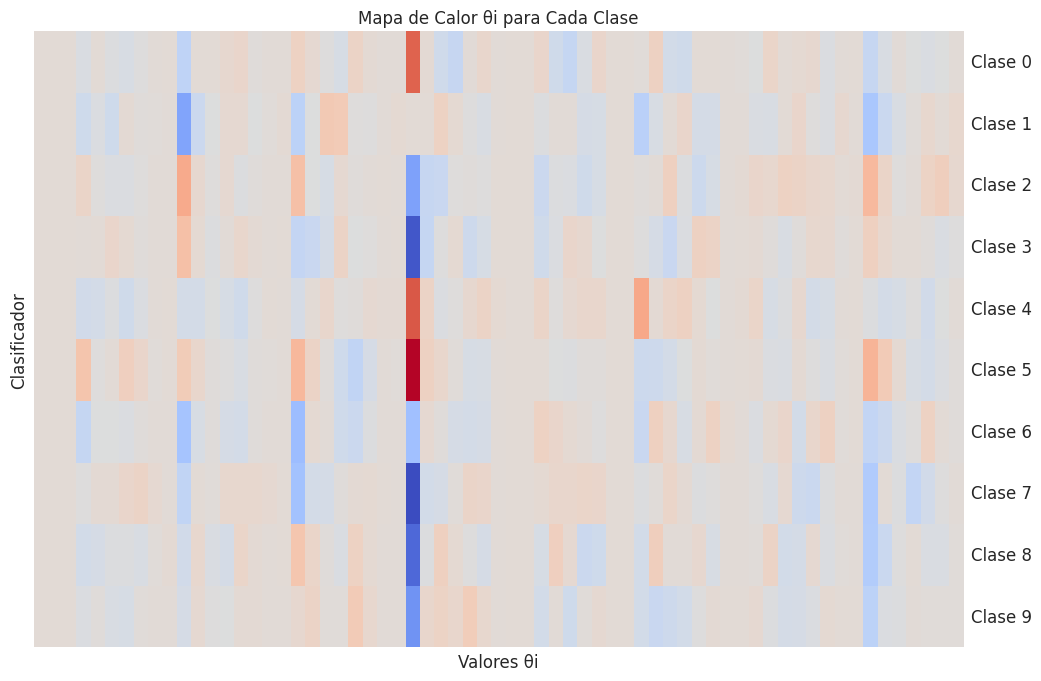

In [127]:
# Crear un mapa de calor para cada clasificador con etiquetas de clase
plt.figure(figsize=(12, 8))
ax = sns.heatmap(theta_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False, cbar=False)

# Obtener las etiquetas de clase de tus clasificadores
class_labels = [params['target'] for params in classifiers]

# Agregar etiquetas de clase junto al mapa de calor
for i, label in enumerate(class_labels):
    ax.text(num_theta_values + 0.5, i + 0.5, f'Clase {label}', ha='left', va='center')

plt.xlabel("Valores Œ∏i")
plt.ylabel("Clasificador")
plt.title("Mapa de Calor Œ∏i para Cada Clase")
plt.show()


## 6. Clasificador Multinomial

A continuaci√≥n implementaremos un Clasificador Multinomial haciendo uso completamente de la librer√≠a scikit-learn desde el procesamiento de datos hasta la presentaci√≥n de resultados.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [95]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
# Crear y entrenar el clasificador multinomial
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

En este caso, el par√°metro solver especifica el algoritmo que se utilizar√° para resolver el problema de optimizaci√≥n en la regresi√≥n log√≠stica. 'lbfgs' (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) es un algoritmo eficiente para problemas de optimizaci√≥n de funciones suaves como la regresi√≥n log√≠stica. Es una elecci√≥n com√∫n para problemas multiclase, que har√≠a las veces de cuando nosotros usamos Descenso Gradiente.

In [98]:
# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

In [99]:
# Paso 5: Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisi√≥n: {accuracy:.2f}')

Exactitud (Accuracy): 0.97


In [100]:
# Mostrar un reporte de clasificaci√≥n
print('\nReporte de Clasificaci√≥n:\n')
print(classification_report(y_test, y_pred))


Reporte de Clasificaci√≥n:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [101]:
# Opcionalmente, puedes mostrar im√°genes de ejemplos mal clasificados
misclassified_indices = np.where(y_test != y_pred)[0]

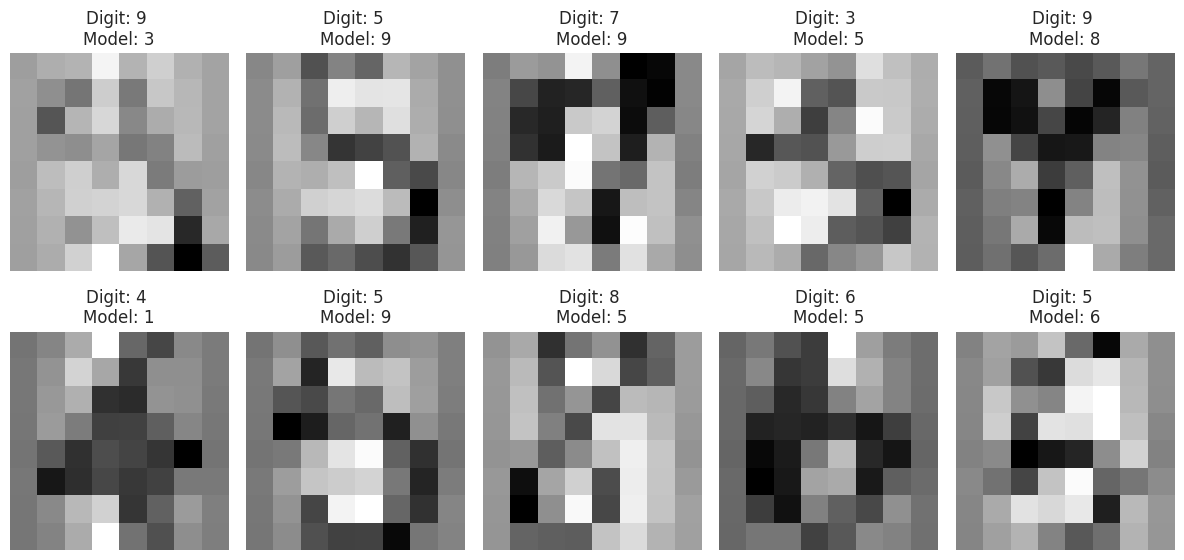

In [113]:
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(8, 8), cmap='binary', vmin=min(X_test[index]), vmax=max(X_test[index]))
    plt.title(f'Digit: {y_test[index]} \nModel: {y_pred[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 7. Comparaci√≥n de Resultados

**KNN (Implementaci√≥n Propia):**
- Desarrollamos nuestra propia implementaci√≥n de KNN y la probamos exhaustivamente.
- A pesar de ser la opci√≥n m√°s lenta, obtuvimos resultados prometedores en la clasificaci√≥n de d√≠gitos.
- Experimentamos con diversas m√©tricas de distancia, como Manhattan, Minkowski, Euclidiana y Chebyshev, para encontrar la m√°s adecuada.
- Luego de explorar nuestra propia implementaci√≥n, decidimos considerar la versi√≥n de KNN proporcionada por scikit-learn.

**KNN (Scikit-learn):**
- Utilizamos la implementaci√≥n de KNN de scikit-learn, que es altamente optimizada y eficiente.
- Esta versi√≥n nos permiti√≥ entrenar y evaluar modelos de manera m√°s r√°pida y eficaz que nuestra implementaci√≥n personal.
- Pudimos ajustar hiperpar√°metros como el n√∫mero de vecinos (`n_neighbors`) y las m√©tricas de distancia seg√∫n nuestras necesidades.
- Observamos que la versi√≥n de scikit-learn ofrec√≠a un rendimiento similar al de nuestra implementaci√≥n personal, pero con una velocidad significativamente mayor.

**Regresi√≥n Log√≠stica:**
- Experimentamos con la regresi√≥n log√≠stica, un modelo de clasificaci√≥n lineal.
- Ajustamos hiperpar√°metros como la tasa de aprendizaje $\eta$ y la regularizaci√≥n $\gamma$ para mejorar el rendimiento.
- Sin embargo, notamos que la regresi√≥n log√≠stica tiende a confundir con frecuencia los d√≠gitos 5, lo que sugiere que es menos eficaz en la distinci√≥n de esa clase espec√≠fica.
- A pesar de tener muchos par√°metros y hiperpar√°metros, la regresi√≥n log√≠stica result√≥ ser menos costosa en t√©rminos de entrenamiento en comparaci√≥n con otros algoritmos m√°s complejos.

**Regresi√≥n Multinomial:**
- Implementamos la regresi√≥n multinomial, que es una extensi√≥n de la regresi√≥n log√≠stica para problemas de clasificaci√≥n multiclase.
- Este modelo es adecuado para tareas de clasificaci√≥n con m√°s de dos clases, como nuestro conjunto de datos de d√≠gitos.
- La regresi√≥n multinomial ajusta m√∫ltiples modelos de regresi√≥n log√≠stica, uno para cada clase.
- Los par√°metros de clasificaci√≥n se determinan mediante una funci√≥n de softmax, que asigna probabilidades a cada clase.
- Experimentamos con diferentes hiperpar√°metros como `solver` y `max_iter` para ajustar el modelo.
- Con la regresi√≥n multinomial, esper√°bamos obtener un rendimiento m√°s equilibrado entre las clases en comparaci√≥n con la regresi√≥n log√≠stica.
- En general, se ibtuvo mejores resultados debido a la complejidad de superficies de decisi√≥n que esta regresi√≥n puede generar, que son m√°s complejas que un plano o hiperplano.

En resumen, como equipo, exploramos varios algoritmos de clasificaci√≥n, ajustando sus hiperpar√°metros y m√©tricas para encontrar la mejor configuraci√≥n en funci√≥n de nuestro conjunto de datos. Cada modelo tiene sus ventajas y desventajas, y la elecci√≥n del modelo adecuado depende de las caracter√≠sticas y los objetivos de nuestro problema espec√≠fico.


## Conclusiones

Como el objetivo es evaluar nuestros conocimientos en clasificaci√≥n, responderemos las siguientes preguntas:

**1. ¬øQu√© influencia tiene el uso de diferentes valores de K en el clasificador KNN?**

Para el algoritmo de KNN, el valor de la salida de nuestro dato depender√° exlusivamente de los valores cercanos a este. La cantidad de valores cercanos que consideremos (vecinos) es de vital importancia ya que determinar√° directamente la influencia que tengan los datos ya existentes a la hora de clasificar un nuevo dato. En nuestros experimentos realizados, pudimos observar que en general la precisi√≥n var√≠a con mucha volatilidad a l ahora d eincrementar los valores de K, pero se puede apreciar claramente que a medida los valores de K aumentan, la precisi√≥n se ve mermada ligeramente. Esto se debe a que mientras m√°s veicnos consideremos, se "suavizan" las decisiones que se toman ya que considera mayor cantidad de vecinos, y hace al algoritmo menos sensible a los datos at√≠picos y m√°s sensible a patrones locales.

Pudimos observar que los valores muy bajos de $k$ hac√≠an un sobreajuste en los datos, y que son estos valores los que generan mayor precisi√≥n con respecto a los datos de prueba. Por el contrario, al aumentar los valores de $k$, el modelo quedaba subajustado, ya que al considerar m√°s vecinos podemos incluso a tener empates de voto entre varias clases y eso puede llegar a ocasionar predicciones err√≥neas dependiendo de como hemos programado la toma de decisiones (en nuestro caso, si hab√≠a empates se escoge uno al azar).

**2. ¬øQu√© diferencias hay entre el clasificador utilizando KNN y regresi√≥n log√≠stica? ¬øFunciona uno mejor que otro?, ¬øPorqu√©?**

En general, pudimos identificar muchas diferencias entre ambos m√©todos.

**En el Aprendizaje**: KNN es un algoritmo que no "aprende" de la manera en la que hab√≠amos trabajado anteriores algoritmos de clasificaci√≥n, sino que guarda todas las instancias de entrenamiento y las usa cada vez que se quiere clasificar una observaci√≥n. Por el contrario, la Regresi√≥n Log√≠stica tiene un proceso de entrenamiento computacionalmente costoso al inicio, que aprende un modelo lineal para generar una superficie de decisi√≥n entre las clases con par√°metros que se utilizar√°n en conjunto con las variables de entrada, y como resultado da un n√∫mero que se puede interpretar como una probabilidad a que dicha observaci√≥n pertenezca a una clase.

**En el Modelo**: KNN no proporciona informaci√≥n muy significativa en cuando a un modelo de ML se refiere, ya que la salida del algoritmo es unicamente una mayor√≠a de votos que representa la clase mayoritaria en las regiones aleda√±as de nuestra observaci√≥n en su correspondiente espacio, mientras que la Regresi√≥n Log√≠stica aprende una serie de par√°metros que cuantifican el aporte de cada variable para as√≠ poder tomar una decisi√≥n.

**En el Costo Computacional:** KNN (por lo menos, en su implementaci√≥n m√°s b√°sica) es un algoritmo muy computacionalmente costoso, ya que para hacer cada clasificaci√≥n, calcula la distancia (con la m√©trica especificada) de la observaci√≥n con cada uno de los datos de entrenamiento. Esta es una operaci√≥n que es demasiado exhaustiva y por eso se han hecho implementaciones que optimicen este proceso por medio de estructuras de √°rboles m√°s complejas (como la implementaci√≥n que trae ScikitLearn). Por el contrario, el costo computacional de Regresi√≥n Log√≠stica solo lo encontramos de manera exhaustiva al inicio, en el aprendizaje d elos par√°metros. Luego de eso solo es evaluar los par√°maetros de cada clasificador y hacer una decisi√≥n, que es relativmente mucho m√°s liviano que estar calculando las distancias entre cada dato y la nueva observaci√≥n.

**En los hiperpar√°metros**: El algorotimo de KNN se puede ajustar para aceptar distintas medidas de distancias entre observaciones, y cada una obtiene resultados distintos. Tambi√©n se puede variar la cnatidad de vecinos a tomar en cuenta, que puede directamente generear sobreajustes o subajustes con solo variar dichos par√°metros. En Regresi√≥n Logs√≠tica, se pueden variar a√∫n muchas m√°s cosas que pueden genera rmodelos completamente distintos, desde la funci√≥n de costo, la regularizaci√≥n, la taza de aprendizaje, las iteraciones a tomar en cuenta, etc.

**En el rendimiento**: En nuestro experimentos, KNN result√≥ ser mucho m√°s preciso qu√© Regresi√≥n Logs√≠tica, pero esta es una cuesti√≥n que se explorar√° en la siguient epregunta.


**3. ¬øEl clasificador de regresi√≥n logistica presenta un buen rendimiento? ¬øC√≥mo evaluan su rendimiento?¬øSi el rendimiento no es bueno que cree se debe hacer para mejorarlo?**

En nuestros experimentos, Regresi√≥n Log√≠stica obtuvo resultados aceptables, m√°s no obtuvo resultados tan buenos como KNN. Esto se puede deber a muchas razones. Como hab√≠amos mencionado anteriormente, KNN es mucho m√°s exacto ya que directamente busca cuales son las observaciones m√°s parecidas, y su exactitud puede variar mucho dependiendo de los datos de entrenamiento recibidos y ser muy sensible a estos, por ejemplo, si hay muchos d√≠gitos $5$ que parecen $6$, ese ser√° un patr√≥n local que f√°cilmente puede influir en la clasificaci√≥n de nuevas observaciones.

Mientras que, para Regresi√≥n Logs√≠tica, se calculan m√∫ltiples aproximaciones de par√°metros, para luego introducirlos en una funci√≥n que nos arroja un resultado interpretable como una probabilidad a que la observaci√≥n pertenezca a una clase. Estos par√°metros no son tan sensibles a los datos at√≠picos, y miden la influencia de cada variable para hacer decisiones. Estos par√°metros se calculan de una manera relativamente compleja a lo que hace KNN, ya que se minimiza una funci√≥n, que tiene en cuentra hiperpar√°metros como la constante d eregularizaci√≥n, la taza de aprendizaje, el n√∫mero de iteraciones m√°ximo, etc.

Para mejorar el rendimiento, podr√≠amos varias estos par√°metros hasta encontrar unbalance entre el costo computacional y la precisi√≥n que deseamos, as√≠ como estudiar cu√°les son las predicciones que el modelo hace mal para poder tal vez redistribuir los datos, ponderarlos de alguna manera o alterar las observaciones de entrenamiento para que no se guarden esos patrones equivocados. Tambi√©n podemos estudiar distintas m√©tricas, como la matriz de confusi√≥n y estudiar cuales son los errores que m√°s se cometen. Podemos observar en nuestro modelo, que la confusi√≥n m√°s frecuente es decir que algunos d√≠gitos $5$ son $9$, y en general, existe mucha confusi√≥n alrededor de esos d√≠gitos.

**4. Al realizar el mapa de calor con los pesos de la regresi√≥n log√≠stica, para los diferentes clasificadores, ¬øQu√© puede notar? ¬øHay algun tipo de patr√≥n?, ¬øS√≠, no, porqu√©?**

Estos mapas de calor resaltan que ciertos d√≠gitos son m√°s distinguibles para ciertos clasificadores, lo que indica especializaci√≥n en la identificaci√≥n de d√≠gitos espec√≠ficos. Adem√°s, la diferencia en los pesos asignados a la misma caracter√≠stica entre clasificadores sugiere que cada clasificador aprende de manera √∫nica y prioriza las caracter√≠sticas de manera diferente. Adem√°s, la no linealidad de los modelos de ponderaci√≥n muestra que la relaci√≥n entre las caracter√≠sticas visuales y las clases de d√≠gitos es compleja y no necesariamente lineal. Esto puede significar que tal vez necesitamos superficies de decisi√≥n m√°s complejas que solo un plano o hiperplano para hacer nuestrs decisiones.


**5. ¬øQu√© puede concluir al final de este proyecto?, escriba su opini√≥n frente a los metodos de clasificaci√≥n y como se aplic√≥ en este proyecto.**

Al final de este proyecto, hemos llegado a algunas conclusiones valiosas. Primero, sabemos que elegir un m√©todo de clasificaci√≥n apropiado depende en gran medida de las caracter√≠sticas de los datos y del problema en cuesti√≥n. En nuestro proyecto, observamos que K-Nearest Neighbors (KNN) con m√©tricas personalizadas e implementaci√≥n automatizada tuvo un buen desempe√±o a pesar de ser m√°s lento, lo que resalta la importancia de explorar diferentes m√©tricas para obtener mejores resultados. Adem√°s, el uso de la biblioteca scikit-learn ha simplificado significativamente la implementaci√≥n de KNN y ha ayudado a aumentar la eficiencia computacional. Sin embargo, tuvimos dificultades para aplicar la regresi√≥n log√≠stica debido a su dependencia de hiperpar√°metros y  entre algunos d√≠gitos (llegando a tener incluso solo un 14 % de precisi√≥n en algunos experimentos). Finalmente, al utilizar la regresi√≥n log√≠stica multinomial, apreciamos c√≥mo esta t√©cnica puede capturar patrones complejos en los datos y ofrecer resultados s√≥lidos.

En resumen, este proyecto nos ayud√≥ a comprender mejor la clasificaci√≥n de datos y nos ense√±√≥ la importancia de explorar, seleccionar y adaptar m√©todos seg√∫n el contexto del problema.

# Regresi√≥n Lineal: Datos artificiales

En el archivo .csv adjunto se encuentra una base de datos creada artificialmente, donde la salida es una funcion de dos variables, es decir $y^{(i)} = f\left(x_1^{(i)},x_2^{(i)}\right)+\eta^{(i)}$, donde $\eta$ respresenta el error de medici√≥n. El objetivo de este problema es que resulvan este problema de regresi√≥n lineal utilizando lso conocimientos obtenidos en clase.



# 1. Carga de los datos.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D  # Importa la herramienta 3D
from ipywidgets import interact, FloatSlider

data = pd.read_csv('https://drive.google.com/uc?export=download&id=16ak77xpA5so1FXdSCr8aOTLVPnROhRzq')
data.shape
# Observando los datos
data.head(10)

X1        X2         y
0   53.766714  1.347397  0.594013
1  183.388501 -1.338226  0.505659
2 -225.884686 -0.800645  0.253316
3   86.217332 -1.343605  0.453381
4   31.876524  1.151258  1.720519
5 -130.768830 -1.556187  0.434455
6  -43.359202 -2.127122  1.032279
7   34.262447  1.105957  1.780675
8  357.839694 -0.846858  0.610009
9  276.943703  0.723174 -0.058932

## 2. An√°lisis Descriptivo de los Datos

In [117]:
data.describe()

X1           X2            y
count  1000.000000  1000.000000  1000.000000
mean     -3.263196     0.073797     0.996858
std      99.896532     1.997194     0.791569
min    -323.203780    -6.144331    -0.650879
25%     -71.263595    -1.240731     0.331548
50%      -3.043251     0.099402     0.947372
75%      61.056271     1.347746     1.649241
max     357.839694     7.139736     3.325075

#### Para ver los datos desde distintas perspectivas
El slider Data es para ver en 3D o desde las perspectivas 2D mientras que Elevaci√≥n y Azimut solo son para mover la perspectiva 3D.

In [118]:
@interact(eje=FloatSlider(value=1, min=1, max=3, step=1, description='Data:'),
          elev=FloatSlider(value=30, min=-90, max=90, step=5, description='Elevaci√≥n:'),
          azim=FloatSlider(value=30, min=-180, max=180, step=5, description='Azimut:'))
def todo(eje, elev, azim):
    fig = plt.figure()
    if eje == 1:
        ax = fig.add_subplot(111, projection='3d')  # Crea un subplot 3D
        ax.scatter(data['X2'], data['X1'], data['y'], marker='o', s=30)
        ax.set_xlabel('Data X1')
        ax.set_ylabel('Data X2')
        ax.set_zlabel('Data y')
        ax.view_init(elev=elev, azim=azim)  # Ajusta la elevaci√≥n y el azimut
        plt.title('Datos en 3D')
    elif eje == 2:
        plt.scatter(data['X1'], data['y'], marker='o', s=30)
        plt.xlabel('Data X1')
        plt.ylabel('Data y')
        plt.title('Datos en Altura')
    else:
        plt.scatter(data['X2'], data['y'], marker='o', s=30)
        plt.xlabel('Data X2')
        plt.ylabel('Data y')
        plt.title('Datos en Altura')

    plt.show()


interactive(children=(FloatSlider(value=1.0, description='Data:', max=3.0, min=1.0, step=1.0), FloatSlider(val‚Ä¶

In [119]:
def extract_and_normalize_column(data, column_name):
    if column_name in data.columns:
        column = data[column_name]
        normalized_column = (column - column.mean()) / column.std()
        return normalized_column
    else:
        raise ValueError(f"La columna '{column_name}' no existe en el DataFrame.")


# Data frame norm
data_x1_norm = extract_and_normalize_column(data, 'X1')
data_x2_norm = extract_and_normalize_column(data, 'X2')
data_y_norm  = extract_and_normalize_column(data, 'y')
data_norm    = pd.DataFrame({    'X1': data_x1_norm,'X2': data_x2_norm,'y': data_y_norm})
data=data_norm

#### Para ver los datos normalizados desde distintas perspectivas
El slider Data es para ver en 3D o desde las perspectivas 2D mientras que Elevaci√≥n y Azimut solo son para mover la perspectiva 3D.
Sin embargo no hubo cambios significativos.

In [120]:
@interact(eje=FloatSlider(value=1, min=1, max=3, step=1, description='Data:'),
          elev=FloatSlider(value=30, min=-90, max=90, step=5, description='Elevaci√≥n:'),
          azim=FloatSlider(value=30, min=-180, max=180, step=5, description='Azimut:'))
def todo(eje, elev, azim):
    fig = plt.figure()
    if eje == 1:
        ax = fig.add_subplot(111, projection='3d')  # Crea un subplot 3D
        ax.scatter(data['X2'], data['X1'], data['y'], marker='o', s=30)
        ax.set_xlabel('Data X1')
        ax.set_ylabel('Data X2')
        ax.set_zlabel('Data y')
        ax.view_init(elev=elev, azim=azim)  # Ajusta la elevaci√≥n y el azimut
        plt.title('Datos en 3D')
    elif eje == 2:
        plt.scatter(data['X1'], data['y'], marker='o', s=30)
        plt.xlabel('Data X1')
        plt.ylabel('Data y')
        plt.title('Datos en Altura')
    else:
        plt.scatter(data['X2'], data['y'], marker='o', s=30)
        plt.xlabel('Data X2')
        plt.ylabel('Data y')
        plt.title('Datos en Altura')

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='Data:', max=3.0, min=1.0, step=1.0), FloatSlider(val‚Ä¶

## 3. Implementaci√≥n de un modelo de regresi√≥n lineal que se ajuste a los datos proporcionados.

**Modelos:**

1. De acuerdon con lo que se observa previamente parece ser sinusoidal.
2. Parece tener un comportamiento lineal.

interactive(children=(FloatSlider(value=6.0, description='corrimiento:', max=10.0, step=1.0), FloatSlider(valu‚Ä¶

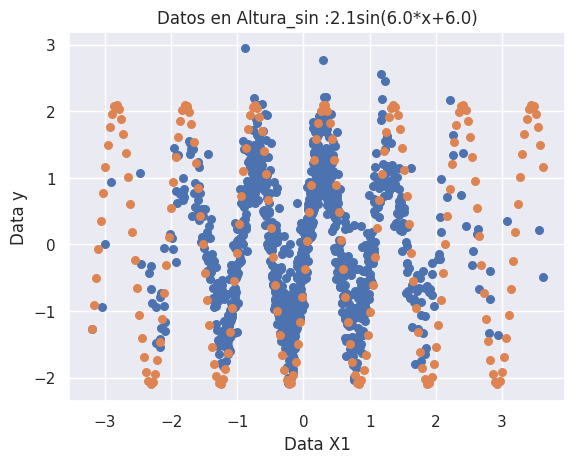

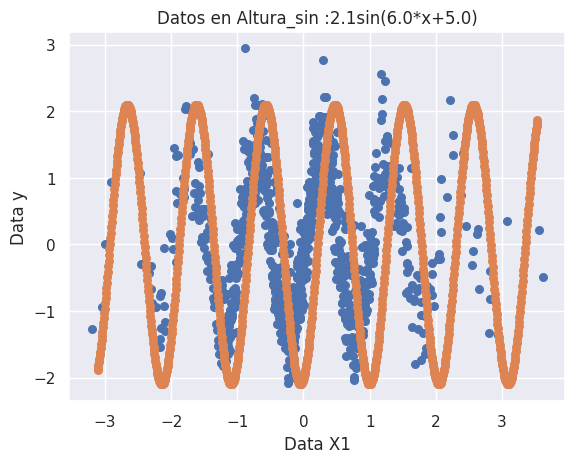

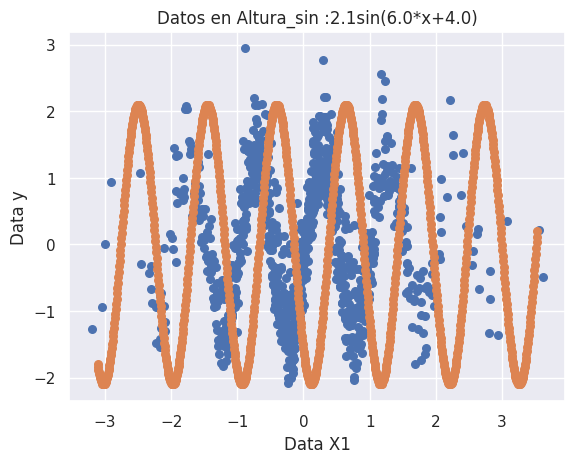

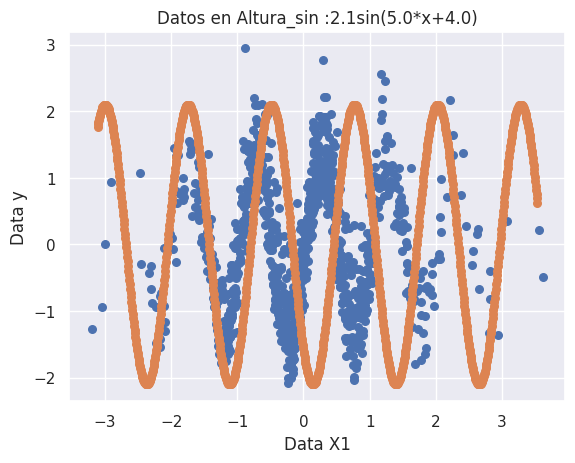

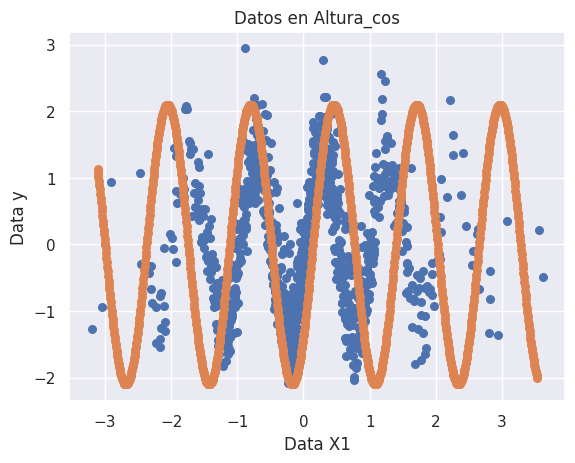

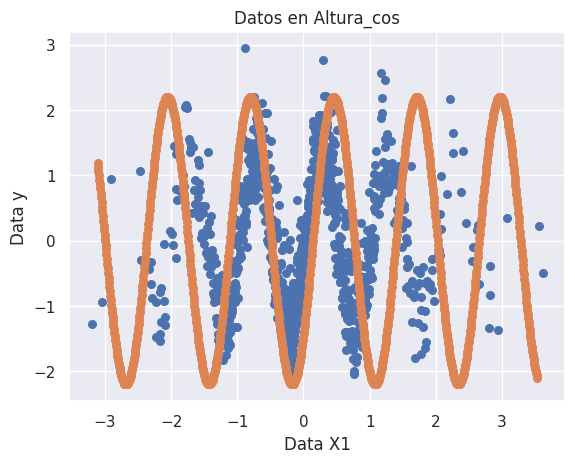

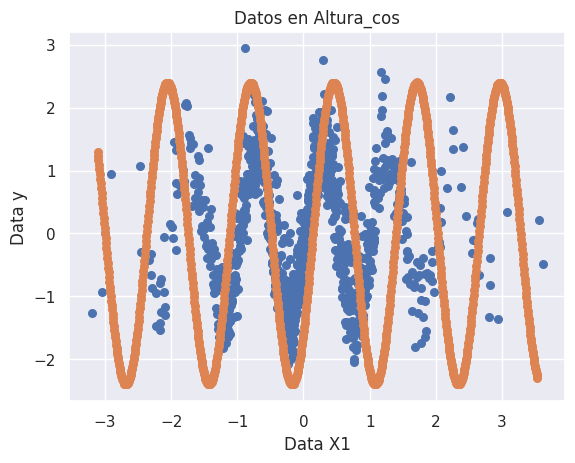

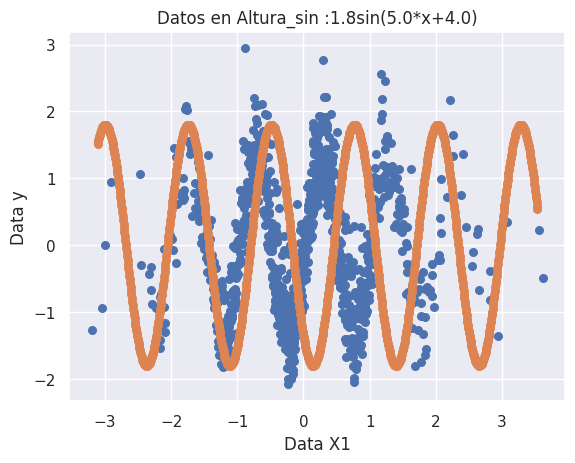

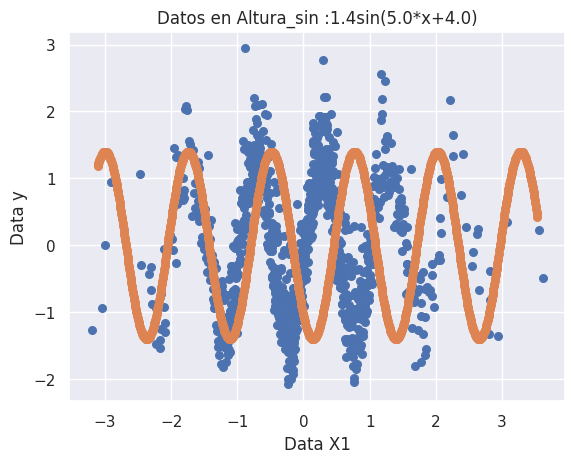

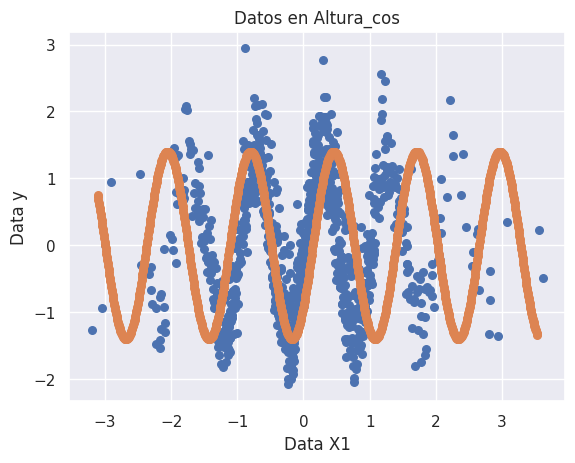

In [121]:
# Valores de x para generar una funci√≥n sinusoidal
val = np.linspace(min(data['X1']), max(data['X1']), 200)  # Valores de 0 a 2*pi para un ciclo completo
@interact(corrimiento=FloatSlider(value=6, min=0, max=10, step=1, description='corrimiento:'),
          frec=FloatSlider(value=6, min=0, max=7, step=1, description='frec:'),
          Sin_cos=FloatSlider(value=1, min=0, max=1, step=1, description='Sin_cos:'),
          Ampli=FloatSlider(value=2.1, min=1, max=3, step=0.1, description='Ampli:'),)
def grafica_1 (corrimiento,frec,Sin_cos,Ampli):
    plt.scatter(data['X1'], data['y'], marker='o', s=30)
    # Crea un gr√°fico de dispersi√≥n con cos(val) en el eje X y 'y' en el eje Y
    if Sin_cos == 1:
        plt.scatter(val, Ampli*np.sin(frec*val+corrimiento), marker='o', s=30)
        plt.title(f'Datos en Altura_sin :{Ampli}sin({frec}*x+{corrimiento})')
        print((f'sin :{Ampli}np.sin({frec}*x+{corrimiento})'))
    else :
        plt.scatter(val, Ampli*np.cos(frec*val+corrimiento), marker='o', s=30)
        plt.title('Datos en Altura_cos')

    plt.xlabel('Data X1')
    plt.ylabel('Data y')

In [122]:
val = np.linspace(min(data['X2']), max(data['X2']), data.shape[0])  # Valores de 0 a 2*pi para un ciclo completo
plt.scatter(data['X2'], data['y'], marker='o', s=30)
plt.scatter(val, -(1/4)*val+1.5, marker='o', s=30)
plt.xlabel('Data X2')
plt.ylabel('Data y')
plt.title('Datos en Altura')

Text(0.5, 1.0, 'Datos en Altura')

## 4. Graficaci√≥n de los datos originales, y los obtenidos por el modelo de regresi√≥n que ustedes implementar√≥n.


En este caso, se us√≥ gradiente desenciente, en la primera grafica se observa la convergencia del mismo.
Por otro lado, en las graficas siguientes se ven los resultados del modelo sobre los datos originales siento los primeros naranja y los siguientes azul.

In [124]:

ones = np.ones((len(data),1))
def funcion_theta_ùëó(h, thetas, y, aprendizaje=0.05, A=np.column_stack((ones*2,ones))):
    dJ = funcion_3_1_Gradiente(h, thetas, y, A)
    nuevo_theta = thetas - aprendizaje * dJ
    return nuevo_theta
def funcion_3_1_Gradiente(h, thetas, y, A):
    e = (h - y)
    dJ = (1 / (len(h))) * np.dot(A.T, e)
    return dJ
def funcion_2_Costo(h,theta,y):
    e=y-h# Calcula el vector de errores (diferencia entre las predicciones y los valores reales)
    J = (1 / (2*len(h))) * np.matmul(np.transpose(e), e)# Calcula la funci√≥n de costo
    return J
def funcion_1_salida_ùê°ùúΩ(A,theta):
    h = np.matmul(A,theta)
    return h
@interact(aprendizaje=FloatSlider(value=00.12, min=0, max=1.5, step=0.005, description='alfa:'),
          lineal=FloatSlider(value=1, min=0, max=4, step=0.005, description='lineal:'),
         itera=FloatSlider(value=50, min=2, max=100, step=1.0, description='itera:'))
def todo(aprendizaje=0.12,itera=50,lineal=1):
    # Forma 1
        # Normalizar los datos
    x1 = extract_and_normalize_column(data, 'X1')
    x2 = extract_and_normalize_column(data, 'X2')
    #y  = extract_and_normalize_column(data, 'y')
    A  = np.column_stack((-x2+1.5,2.1*np.sin(6.0*x1+6.0),ones))   #con cosas que no sirven
    A  = np.column_stack((x2,np.sin(6.0*x1),ones))                #con lo que si afecto
     # Forma 2
    x  = (data.iloc[:, :-1].values - np.mean(data.iloc[:, :-1].values, axis=0)) / np.std(data.iloc[:, :-1].values, axis=0)
    y  = data.iloc[:, -1].values
    #A  = np.column_stack((-x[:, 1]+1.5,2.1*np.sin(6.0*x[:, 0]+6.0),ones))
    theta=np.random.rand(A.shape[1])

    #plt.scatter(x1,y,alpha=0.4,edgecolor='none')
    #plt.scatter(x[:, 0],y,alpha=0.4,edgecolor='none')

    #plt.scatter(x[:, 0],x1,alpha=0.4,edgecolor='none')
    #plt.scatter(x[:, 1],x2,alpha=0.4,edgecolor='none')


    acumulados=[]
    for i in range(int(itera)):
        h=funcion_1_salida_ùê°ùúΩ(A,theta)
        #print(h)
        J_Ref=funcion_2_Costo(h,theta,y)
        #print(J_Ref)
        acumulados.append(J_Ref)
        #print(acumulados)
        dJ=funcion_3_1_Gradiente(h,theta,y,A)
        #print(dJ)
        theta = funcion_theta_ùëó(h, theta, y, aprendizaje, A)
        #print(dJ)
    plt.figure()
    plt.plot(acumulados)
    plt.xlabel('Iteraci√≥n')
    plt.ylabel('Costo ')
    plt.title(f"Costo con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()

    plt.scatter(data['X2'], data['y'],alpha=0.4,edgecolor='none')
    plt.scatter(data['X2'],h,alpha=0.4,edgecolor='none')
    plt.xlabel('X2')
    plt.ylabel('h')
    plt.title(f"Resultados del modelo en X2 con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()

    plt.scatter(data['X1'], data['y'],alpha=0.4,edgecolor='none')
    plt.scatter(data['X1'],h,alpha=0.4,edgecolor='none')
    plt.xlabel('X1')
    plt.ylabel('h')
    plt.title(f"Resultados del modelo en X1 con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()


interactive(children=(FloatSlider(value=0.12, description='alfa:', max=1.5, step=0.005), FloatSlider(value=50.‚Ä¶

## 5. Discusi√≥n de los resultados obtenidos.

**1. ¬øC√≥mo evaluar√≥n que la regresi√≥n fuera adecuada?**

Puesto que el gradiente convergio, se espera que la funcion de costo sea minima, asi mismo, al graficar los datos tanto en X1 como X1 se observa que el comportamiento dle moselo es similar al de los datos originales.

**2. ¬øRealizar√≥n alg√∫n tipo de transformaci√≥n no lineal a los datos de entrada? Si fue as√≠, ¬øQu√© transformaci√≥n realizar√≥n y por qu√©?**

Si, se realizo la transformacion Seno para los datos X1 porque la dsitribucion tenia esta forma.
**3. ¬øConsidera que los resultados obtenidos son adecuados, o se pueden mejorar?**

Si bien los datos obtenidos son muy adecuados probablemente con metodos m√†s exaustivos se puedan obtener mejores resultados.

**4. ¬øQu√© puede concluir al final de este proyecto?, escriba su opini√≥n frente a los metodos de regresi√≥n lineal y como se aplic√≥ en este proyecto.**

Dado que este metodo ya se habia contruido para implementarlo en la tarea, el desarrollo de aplicarlo fue sencillo y no requirio mucho tiempo para obtener resultados valiosos.